#  UTMB Prediction Evaluation

Evaluating the Average Pace prediction model made in the Predictions section

In [1]:
import os.path
import datetime
import pandas as pd
import numpy as np
import hashlib
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline

# Display all columns in Pandas
pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv('../../data/pace_predictions.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,Unnamed: 0,category,gender,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean
0,0,Senior Men (23-39),Male,14.183180,13.489501,11.680842,13.330479,13.330815,13.089284
1,1,Senior Men (23-39),Male,15.188612,13.489501,12.564133,14.455599,14.455653,14.593701
2,2,Senior Men (23-39),Male,16.367387,13.945114,14.427646,15.297827,15.298082,15.796754
3,3,Masters Men 1 (40-49),Male,17.602140,15.121991,14.267966,15.590489,15.591208,15.625839
4,4,Masters Men 1 (40-49),Male,14.964501,13.769848,13.358058,14.010092,14.010088,13.451506


In [4]:
df['pb_error'] = df.best_pb_prediction - df.query_pb
df['pb_error'] = df.pb_error.abs()
df['mean_error'] = df.mean_pb_average_pace - df.query_pb
df['mean_error'] = df.mean_error.abs()
df['cos_error'] = df.weighted_mean - df.query_pb
df['cos_error'] = df.cos_error.abs()
df['euc_error'] = df.euc_weighted_mean - df.query_pb
df['euc_error'] = df.euc_error.abs()

In [5]:
df.head()

,Unnamed: 0,category,gender,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean,pb_error,mean_error,cos_error,euc_error
0,0,Senior Men (23-39),Male,14.183180,13.489501,11.680842,13.330479,13.330815,13.089284,1.808659,0.159022,0.158686,0.400218
1,1,Senior Men (23-39),Male,15.188612,13.489501,12.564133,14.455599,14.455653,14.593701,0.925368,0.966098,0.966152,1.104200
2,2,Senior Men (23-39),Male,16.367387,13.945114,14.427646,15.297827,15.298082,15.796754,0.482533,1.352713,1.352969,1.851640
3,3,Masters Men 1 (40-49),Male,17.602140,15.121991,14.267966,15.590489,15.591208,15.625839,0.854025,0.468498,0.469217,0.503848
4,4,Masters Men 1 (40-49),Male,14.964501,13.769848,13.358058,14.010092,14.010088,13.451506,0.411790,0.240244,0.240240,0.318342


In [6]:
df = df.dropna()

In [7]:
len(df)

1611

In [8]:
df.describe()

,Unnamed: 0,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean,pb_error,mean_error,cos_error,euc_error
count,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000
mean,805.000000,14.836181,13.740635,12.712233,13.903335,13.903345,13.893499,1.409258,0.924347,0.924235,0.897304
std,465.199957,2.275888,2.360811,1.967970,2.026797,2.026847,2.058947,1.213613,0.872026,0.872159,0.862005
min,0.000000,7.408082,7.012357,7.017497,7.886708,7.891352,7.896573,0.000367,0.000113,0.000235,0.000331
25%,402.500000,13.632664,12.236101,11.344343,12.635901,12.634577,12.624218,0.520981,0.309182,0.309111,0.294636
50%,805.000000,15.340374,14.112014,12.947836,14.594737,14.593828,14.570807,1.084714,0.719107,0.719244,0.672733
75%,1207.500000,16.465509,15.494549,14.306491,15.489829,15.490074,15.539360,1.969389,1.261859,1.262068,1.229315
max,1610.000000,20.051042,21.825333,16.743471,16.599829,16.599651,16.673339,9.693812,8.245851,8.246653,7.955017


In [9]:
df.sort_values(by = 'weighted_mean')

,Unnamed: 0,category,gender,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean,pb_error,mean_error,cos_error,euc_error
798,798,Senior Men (23-39),Male,7.408082,7.012357,7.017497,7.886708,7.891352,7.896573,0.005139,0.874351,0.878994,0.884215
1213,1213,Senior Men (23-39),Male,8.250002,8.106394,7.809304,7.940091,7.939923,7.997914,0.297090,0.166303,0.166471,0.108480
1571,1571,Senior Men (23-39),Male,8.140912,8.141435,7.706042,7.963095,7.962934,7.950372,0.435393,0.178340,0.178501,0.191063
931,931,Senior Men (23-39),Male,7.761441,7.466542,7.346841,8.030584,8.030893,7.911646,0.119701,0.564042,0.564351,0.445103
334,334,Senior Men (23-39),Male,8.442793,8.572737,7.997654,8.091664,8.091770,8.031536,0.575083,0.481072,0.480967,0.541201
1572,1572,Senior Men (23-39),Male,8.039194,8.141435,7.609757,8.119487,8.119373,8.113267,0.531678,0.021948,0.022062,0.028168
1072,1072,Senior Men (23-39),Male,8.235962,8.056571,7.796014,8.127974,8.127964,8.127410,0.260557,0.071403,0.071393,0.070839
438,438,Masters Men 1 (40-49),Male,8.478720,8.607811,8.301849,8.145344,8.145315,8.147262,0.305961,0.462466,0.462496,0.460549
74,74,Senior Men (23-39),Male,8.051072,7.352225,7.745169,8.174848,8.174348,8.031906,0.392943,0.822623,0.822123,0.679681
1021,1021,Masters Men 1 (40-49),Male,8.351205,8.125180,8.176995,8.193607,8.193431,8.195018,0.051815,0.068427,0.068251,0.069838


# All

In [10]:

abestpb = sqrt(mean_squared_error(df.query_pb, df.best_pb_prediction))
ameanpb = sqrt(mean_squared_error(df.query_pb, df.mean_pb_average_pace))
aweightpb = sqrt(mean_squared_error(df.query_pb, df.weighted_mean))
aeucpb = sqrt(mean_squared_error(df.query_pb, df.euc_weighted_mean))

print('Fastest Case Error:', abestpb)
print('Mean of Cases Error:', ameanpb)
print('Weighted Mean:', aweightpb)
print('Euclidean Weighted Mean:', aeucpb)


Fastest Case Error: 1.859556323248879
Mean of Cases Error: 1.2705799879828616
Weighted Mean: 1.270590388962552
Euclidean Weighted Mean: 1.2440844666270396


###  Percentage error

In [11]:
abestper = ((df.pb_error / df.query_pb) * 100).mean()
#astd = ((df.pb_error / df.query_pb) * 100).std()
ameanper = ((df.mean_error / df.query_pb) * 100).mean()
acosper = ((df.cos_error / df.query_pb) * 100).mean()
aeucper = ((df.euc_error / df.query_pb) * 100).mean()

print('Fastest Case Percentage: ', abestper)
print('Mean of Cases Percentage: ',  ameanper)
print('Cosine Mean %:',  acosper)
print('Euclidean Mean %: ', aeucper)

Fastest Case Percentage:  9.864390074446712
Mean of Cases Percentage:  6.946618220570911
Cosine Mean %: 6.945719489183475
Euclidean Mean %:  6.725855221333613


In [12]:
male = df[df.gender == 'Male']

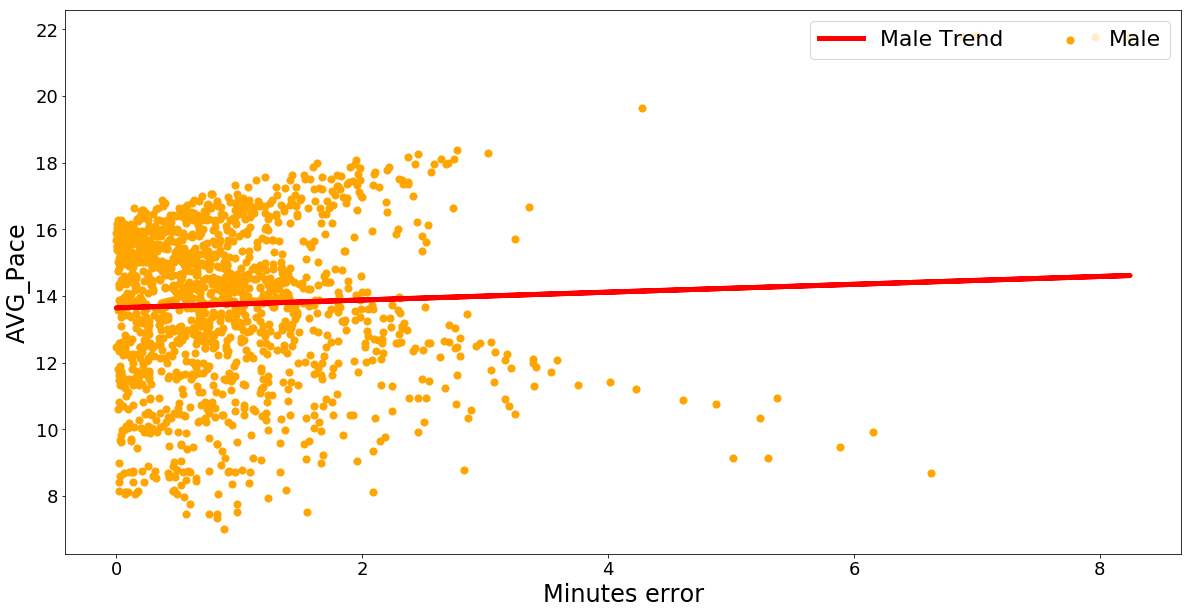

In [13]:
fig = plt.figure()
ax1 = male.plot(kind='scatter', x='mean_error', y='query_pb', color='orange', figsize=(20, 10), fontsize = 18, s=50)  
x = male['mean_error']
y = male['query_pb']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-", linewidth = 5)
# ax2 = female.plot(kind='scatter', x='Start_Pace', y='time', color='blue', ax=ax1, s=50)
# x1 = female['Start_Pace']
# y1 = female['time']
# z1 = np.polyfit(x1, y1, 1)
# p1 = np.poly1d(z1)
# plt.plot(x1,p1(x1),"k-", linewidth = 5)

ax1.set_ylabel('AVG_Pace', fontsize = 24)
ax1.set_xlabel('Minutes error', fontsize = 24)
fig.suptitle('Average 1km pace per Category', fontsize=20)
ax1.legend(['Male Trend', 'Male'], frameon = True, ncol=2, loc='upper right', fontsize = 22)

# Male

In [14]:
len(male)

1504

In [15]:

mbestpb = sqrt(mean_squared_error(male.query_pb, male.best_pb_prediction))
mmeanpb = sqrt(mean_squared_error(male.query_pb, male.mean_pb_average_pace))
mweightpb = sqrt(mean_squared_error(male.query_pb, male.weighted_mean))
meucpb = sqrt(mean_squared_error(male.query_pb, male.euc_weighted_mean))

print('Male Fastest Case Error:', mbestpb)
print('Male Mean of Cases Error:', mmeanpb)
print('Male Weighted Mean of Cases Error:', mweightpb)
print('Male Euclidean Weighted Mean of Cases Error:', meucpb)

Male Fastest Case Error: 1.8678833211261598
Male Mean of Cases Error: 1.281743542761431
Male Weighted Mean of Cases Error: 1.2817552989194718
Male Euclidean Weighted Mean of Cases Error: 1.2540434172366628


###  Percentage error

In [16]:
mbestper = ((male.pb_error / male.query_pb) * 100).mean()
mmeanper = ((male.mean_error / male.query_pb) * 100).mean()
mcosper = ((male.cos_error / male.query_pb) * 100).mean()
meucper = ((male.euc_error / male.query_pb) * 100).mean()

print('Fastest Case Percentage: ', mbestper)
print('Mean of Cases Percentage: ',  mmeanper)
print('Cosine Mean %:',  mcosper)
print('Euclidean Mean %: ', meucper)

Fastest Case Percentage:  9.920879193352421
Mean of Cases Percentage:  7.015250751099734
Cosine Mean %: 7.0146946226022155
Euclidean Mean %:  6.78303736362925


# Female

In [17]:
female = df[df.gender == 'Female']

In [18]:
len(female)

107

In [19]:


fbestpb = sqrt(mean_squared_error(female.query_pb, female.best_pb_prediction))
fmeanpb = sqrt(mean_squared_error(female.query_pb, female.mean_pb_average_pace))
fweightpb = sqrt(mean_squared_error(female.query_pb, female.weighted_mean))
feucpb = sqrt(mean_squared_error(female.query_pb, female.euc_weighted_mean))

print('Female Fastest Case Error:', fbestpb)
print('Female Mean of Cases Error:', fmeanpb)
print('Female Weighted Mean of Cases Error', fweightpb)
print('Female Euclidean Weighted Mean of Cases Error:', feucpb)

Female Fastest Case Error: 1.7382956886635192
Female Mean of Cases Error: 1.1017593737620186
Female Weighted Mean of Cases Error 1.1017477266611775
Female Euclidean Weighted Mean of Cases Error: 1.0945541741000286


###  Percentage error

In [20]:
fbestper = ((female.pb_error / female.query_pb) * 100).mean()
fmeanper = ((female.mean_error / female.query_pb) * 100).mean()
fcosper = ((female.cos_error / female.query_pb) * 100).mean()
feucper = ((female.euc_error / female.query_pb) * 100).mean()

print('Fastest Case Percentage: ', fbestper)
print('Mean of Cases Percentage: ',  fmeanper)
print('Cosine Mean %:',  fcosper)
print('Euclidean Mean %: ', feucper)

Fastest Case Percentage:  9.0703747956225
Mean of Cases Percentage:  5.981914240053621
Cosine Mean %: 5.976199856830392
Euclidean Mean %:  5.922098753925775


In [21]:
mean = [ameanpb, mmeanpb, fmeanpb ]
best = [abestpb, mbestpb, fbestpb]
w_mean = [aweightpb, mweightpb, fweightpb]
euc_mean =[aeucpb, meucpb, feucpb]

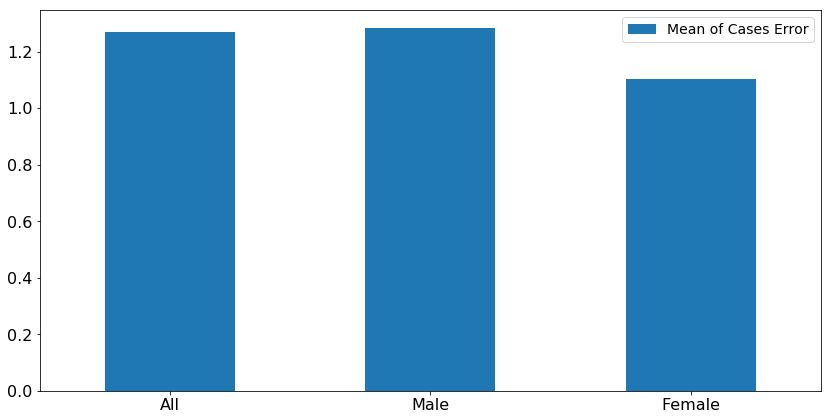

In [22]:
index = ['All', 'Male',  'Female']
gra = pd.DataFrame({'Mean of Cases Error': mean}, index=index)
ax = gra.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

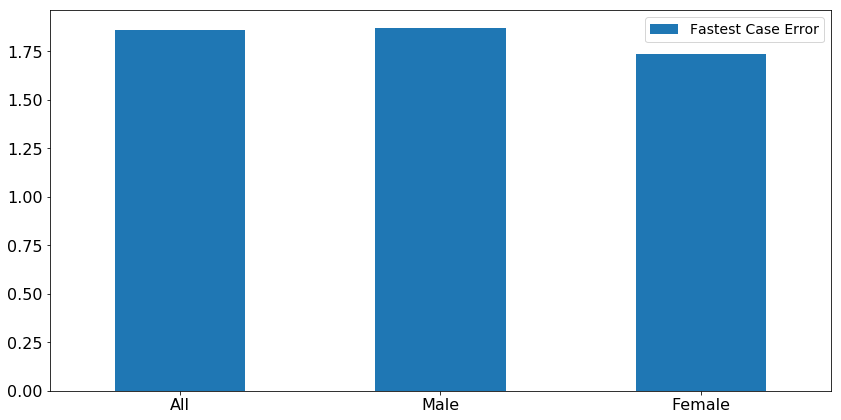

In [23]:
index = ['All', 'Male', 'Female']
gra2 = pd.DataFrame({'Fastest Case Error': best}, index=index)
ax = gra2.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

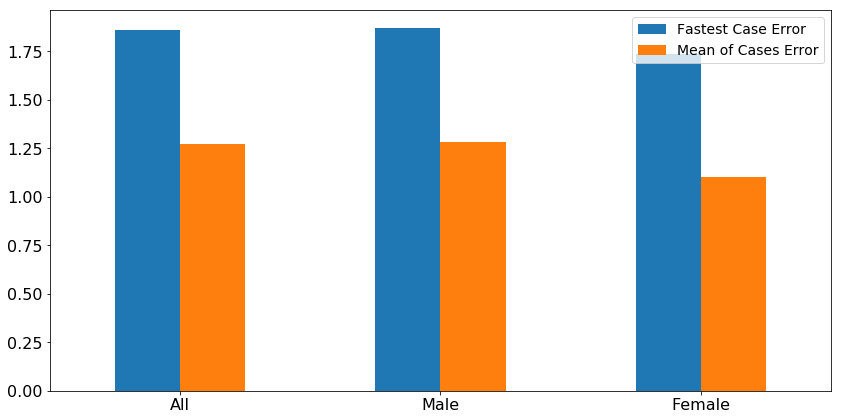

In [24]:
index = ['All', 'Male', 'Female']
gra1 = pd.DataFrame({'Mean of Cases Error': mean, 'Fastest Case Error': best}, index=index)
ax = gra1.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

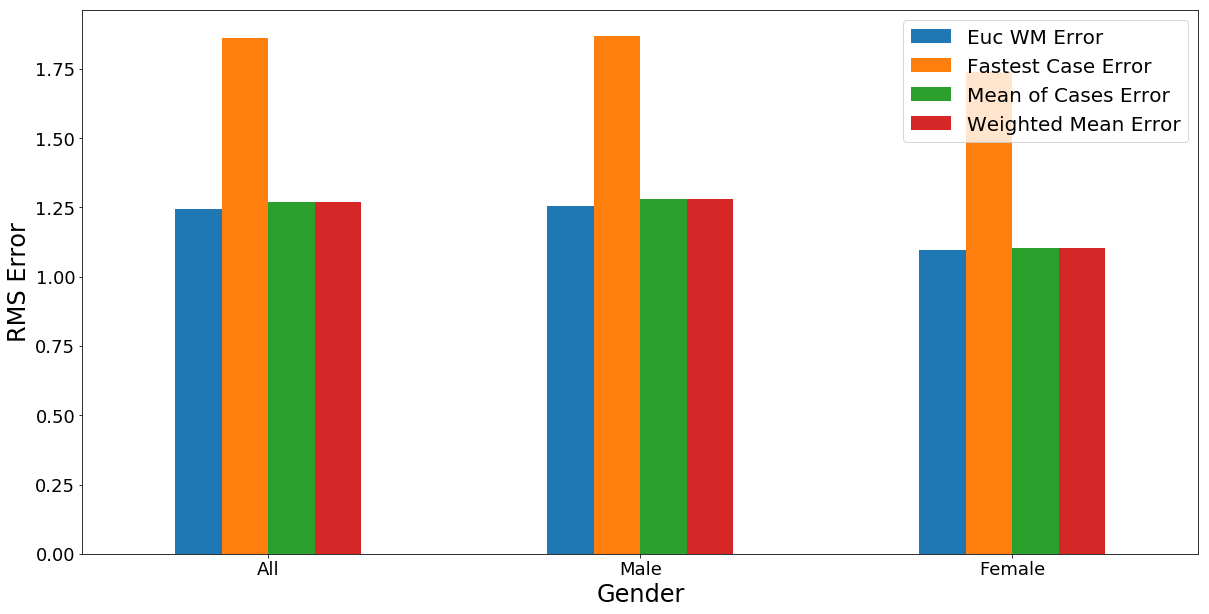

In [25]:
index = ['All', 'Male', 'Female']
gra_w = pd.DataFrame({'Mean of Cases Error': mean, 'Fastest Case Error': best, 'Weighted Mean Error': w_mean, 'Euc WM Error': euc_mean}, index=index)
ax = gra_w.plot.bar(figsize=(20, 10), fontsize=18, rot=0)
ax.set_ylabel('RMS Error', fontsize = 24)
ax.set_xlabel('Gender', fontsize = 24)
ax.legend(fontsize = 20)

In [26]:
mean = [ameanper, mmeanper, fmeanper ]
best = [abestper, mbestper, fbestper]
w_mean = [acosper, mcosper, fcosper]
euc_mean =[aeucper, meucper, feucper]

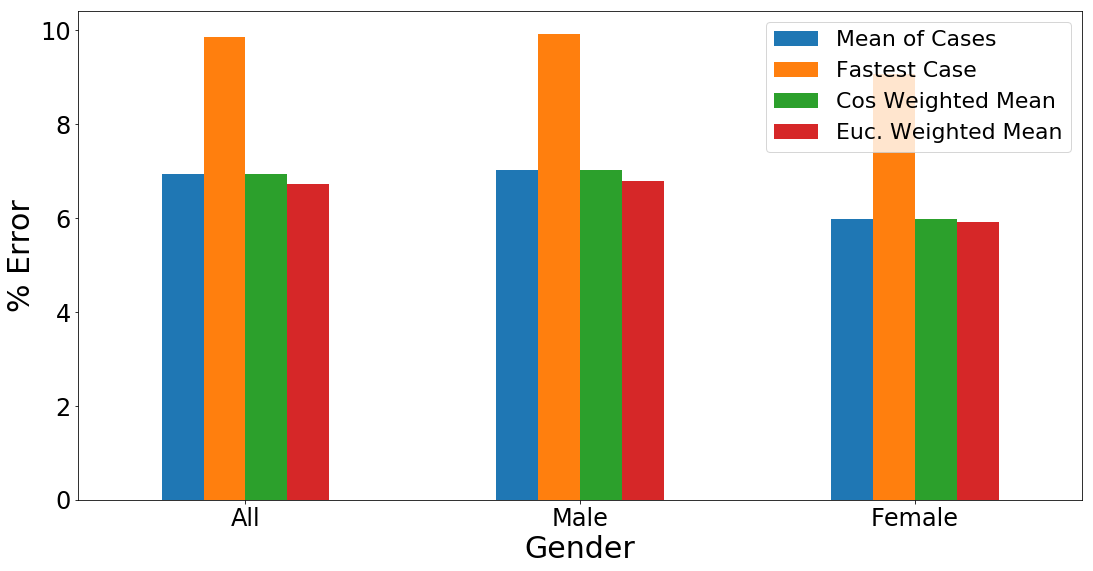

In [27]:
index = ['All', 'Male', 'Female']
gra_w = pd.DataFrame({'Euc. Weighted Mean': euc_mean, 'Fastest Case': best, 'Cos Weighted Mean': w_mean, 'Mean of Cases': mean}, index=index)
gra_w = gra_w[['Mean of Cases', 'Fastest Case', 'Cos Weighted Mean', 'Euc. Weighted Mean']]
ax = gra_w.plot.bar(figsize=(18, 9), fontsize=24, rot=0)
ax.set_ylabel('% Error', fontsize = 30)
ax.set_xlabel('Gender', fontsize = 30)
ax.legend(fontsize = 22)

The main average pace prediction to focus on is using historical UTMB average paces to predict
PB UTMB average pace. The fastest case error is the worst prediction for each gender, with
a percentage error of just under 10%. The error is marginally better for females. The mean of
cases error is just under 7% for males and around 6% for females. Again, female predictions
are considerably better. To put these predictions into perspective if there is a male who has an
actual PB average pace of 10 minutes per kilometre. The fastest case outputs the prediction of
9 minutes per kilometre, while the mean prediction would be 9.3 minutes per kilometre. For a
female running 10 minutes per kilometre, the fastest case would predict an average pace of 9.1
minutes per kilometre and the mean of cases would predict 9.4 minutes per kilometre. Weighting
the mean by euclidean distance produces better results than cosine distance. The reason for
this is that cosine similarity gives an extremely small difference between the most similar and
least similar runners, so weighting in terms of this similarity does not effect the mean greatly.
euclidean distance produces a greater distance between the most similar and least similar runners,
so subsequently gives a higher weight to the more similar runners. This has a greater effect on
the mean, which overall produces a better result.


In [28]:
euc_mean

[6.725855221333613, 6.78303736362925, 5.922098753925775]

# Categories

In [29]:
sen = df[df.category == 'Senior Men (23-39)']

mas = df[df.category == 'Masters Men 1 (40-49)']

mas2 = df[df.category == 'Masters Men 2 (50-59)']

mas3 = df[df.category == 'Masters Men 3 (60-69)']

wom1 = df[df.category == 'Masters Women 1 (40-49)']

wom2 = df[df.category == 'Masters Women 2 (50-59)']

senW = df[df.category == 'Senior Women (23-39)']

you = df[df.category == 'Youth Men (20-22)']

In [30]:


snrB = sqrt(mean_squared_error(sen.query_pb, sen.best_pb_prediction))
snrM = sqrt(mean_squared_error(sen.query_pb, sen.mean_pb_average_pace))
snrw = sqrt(mean_squared_error(sen.query_pb, sen.weighted_mean))
snrE = sqrt(mean_squared_error(sen.query_pb, sen.euc_weighted_mean))

mas1B = sqrt(mean_squared_error(mas.query_pb, mas.best_pb_prediction))
mas1M = sqrt(mean_squared_error(mas.query_pb, mas.mean_pb_average_pace))
mas1BW = sqrt(mean_squared_error(mas.query_pb, mas.weighted_mean))
mas1ME = sqrt(mean_squared_error(mas.query_pb, mas.euc_weighted_mean))

mas2B = sqrt(mean_squared_error(mas2.query_pb, mas2.best_pb_prediction))
mas2M = sqrt(mean_squared_error(mas2.query_pb, mas2.mean_pb_average_pace))

mas3B = sqrt(mean_squared_error(mas3.query_pb, mas3.best_pb_prediction))
mas3M = sqrt(mean_squared_error(mas3.query_pb, mas3.mean_pb_average_pace))

wom1B = sqrt(mean_squared_error(wom1.query_pb, wom1.best_pb_prediction))
wom1M = sqrt(mean_squared_error(wom1.query_pb, wom1.mean_pb_average_pace))

wom2B = sqrt(mean_squared_error(wom2.query_pb, wom2.best_pb_prediction))
wom2M = sqrt(mean_squared_error(wom2.query_pb, wom2.mean_pb_average_pace))

senWB = sqrt(mean_squared_error(senW.query_pb, senW.best_pb_prediction))
senWM = sqrt(mean_squared_error(senW.query_pb, senW.mean_pb_average_pace))

#youB = sqrt(mean_squared_error(you.query_pb, you.best_pb_prediction))
#youM = sqrt(mean_squared_error(you.query_pb, you.mean_pb_average_pace))

print('Senior Men Fastest Case Error:', snrB)
print('Senior Men Mean of Cases Error:', snrM)
print('Master 1 Fastest Case Error:', mas1B)
print('Master 1 Mean of Cases Error:', mas1M)
print('Master 2 Fastest Case Error:', mas2B)
print('Master 2 Mean of Cases Error:', mas2M)
print('Master 3 Fastest Case Error:', mas3B)
print('Master 3 Mean of Cases Error:', mas3M)
print('Master Women 1 Fastest Case Error:', wom1B)
print('Master Women 1 Mean of Cases Error:', wom1M)
print('Master Women 2 Fastest Case Error:', wom2B)
print('Master Women 2 Mean of Cases Error:', wom2M)
print('Senior Women Fastest Case Error:', senWB)
print('Senior Women Mean of Cases Error:', senWM)


Senior Men Fastest Case Error: 2.15083927838414
Senior Men Mean of Cases Error: 1.4023368321492093
Master 1 Fastest Case Error: 1.6111520844750833
Master 1 Mean of Cases Error: 1.1546472823121152
Master 2 Fastest Case Error: 1.978048512711793
Master 2 Mean of Cases Error: 1.3936296049810413
Master 3 Fastest Case Error: 1.0471733675220452
Master 3 Mean of Cases Error: 0.7201863346395937
Master Women 1 Fastest Case Error: 1.0358633914025912
Master Women 1 Mean of Cases Error: 0.8258096103870808
Master Women 2 Fastest Case Error: 2.4575365379044993
Master Women 2 Mean of Cases Error: 1.8541798470144126
Senior Women Fastest Case Error: 2.0550356748502185
Senior Women Mean of Cases Error: 1.1399427454020938


In [31]:
mean1 = [snrM, mas1M, mas2M, mas3M, wom1M, wom2M, senWM]
best1 = [snrB, mas1B, mas2B, mas3B, wom1B, wom2B, senWB]

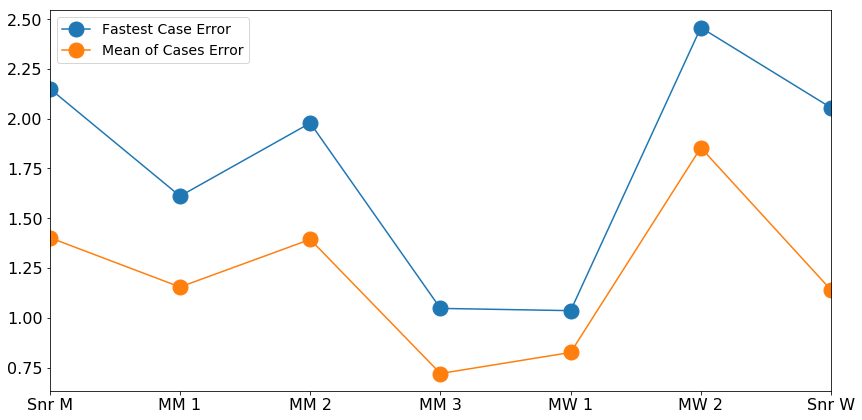

In [32]:
index = ['Snr M', 'MM 1', 'MM 2', 'MM 3', 'MW 1', 'MW 2', 'Snr W']
gra3 = pd.DataFrame({'Mean of Cases Error': mean1, 'Fastest Case Error': best1}, index=index)
ax = gra3.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

# Ability

In [33]:
g9 = df[(df.query_pb <= 9)]
g11 = df[(df.query_pb > 9) & (df.query_pb <= 11)]
g13 = df[(df.query_pb > 11) & (df.query_pb <= 13)]
g15 = df[(df.query_pb > 13) & (df.query_pb <= 15)]
g17 = df[(df.query_pb > 15) & (df.query_pb <= 17)]
g19 = df[(df.query_pb > 17)]

## Bin counts

In [34]:
g9count = g9.shape[0]
g11count = g11.shape[0]
g13count = g13.shape[0]
g15count = g15.shape[0]
g17count = g17.shape[0]
g19count = g19.shape[0]

In [35]:
count = [g9count, g11count, g13count, g15count, g17count, g19count]

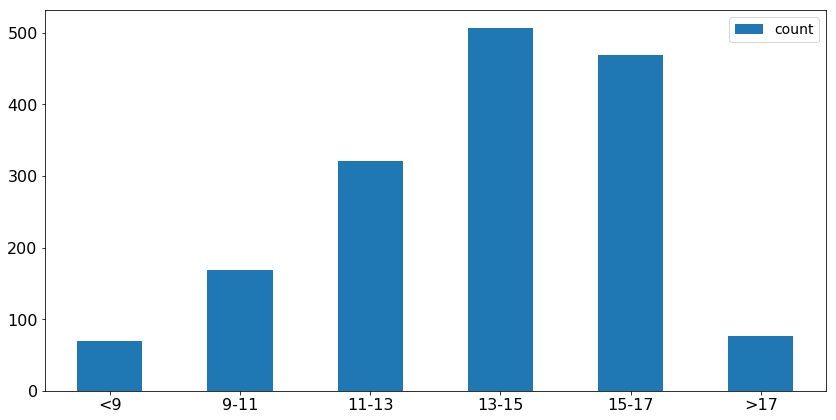

In [36]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra7 = pd.DataFrame({'count': count}, index=index)
ax = gra7.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [37]:


g9B = sqrt(mean_squared_error(g9.query_pb, g9.best_pb_prediction))
g9M = sqrt(mean_squared_error(g9.query_pb, g9.mean_pb_average_pace))
g9W = sqrt(mean_squared_error(g9.query_pb, g9.weighted_mean))
g9E = sqrt(mean_squared_error(g9.query_pb, g9.euc_weighted_mean))

g11B = sqrt(mean_squared_error(g11.query_pb, g11.best_pb_prediction))
g11M = sqrt(mean_squared_error(g11.query_pb, g11.mean_pb_average_pace))
g11W = sqrt(mean_squared_error(g11.query_pb, g11.weighted_mean))
g11E = sqrt(mean_squared_error(g11.query_pb, g11.euc_weighted_mean))

g13B = sqrt(mean_squared_error(g13.query_pb, g13.best_pb_prediction))
g13M = sqrt(mean_squared_error(g13.query_pb, g13.mean_pb_average_pace))
g13W = sqrt(mean_squared_error(g13.query_pb, g13.weighted_mean))
g13E = sqrt(mean_squared_error(g13.query_pb, g13.euc_weighted_mean))

g15B = sqrt(mean_squared_error(g15.query_pb, g15.best_pb_prediction))
g15M = sqrt(mean_squared_error(g15.query_pb, g15.mean_pb_average_pace))
g15W = sqrt(mean_squared_error(g15.query_pb, g15.weighted_mean))
g15E = sqrt(mean_squared_error(g15.query_pb, g15.euc_weighted_mean))

g17B = sqrt(mean_squared_error(g17.query_pb, g17.best_pb_prediction))
g17M = sqrt(mean_squared_error(g17.query_pb, g17.mean_pb_average_pace))
g17W = sqrt(mean_squared_error(g17.query_pb, g17.weighted_mean))
g17E = sqrt(mean_squared_error(g17.query_pb, g17.euc_weighted_mean))

g19B = sqrt(mean_squared_error(g19.query_pb, g19.best_pb_prediction))
g19M = sqrt(mean_squared_error(g19.query_pb, g19.mean_pb_average_pace))
g19W = sqrt(mean_squared_error(g19.query_pb, g19.weighted_mean))
g19E = sqrt(mean_squared_error(g19.query_pb, g19.euc_weighted_mean))


print('U9 Fastest Case Error:', g9B)
print('U9 Mean of Cases Error:', g9M)
print('9-11 Fastest Case Error:', g11B)
print('9-11 Mean of Cases Error:', g11M)
print('11-13 Fastest Case Error:', g13B)
print('11-13 Mean of Cases Error:', g13M)
print('13-15 Fastest Case Error:', g15B)
print('13-15 Mean of Cases Error:', g15M)
print('15-17 Fastest Case Error:', g17B)
print('15-17 Mean of Cases Error:', g17M)
print('O17 Fastest Case Error:', g19B)
print('017 Mean of Cases Error:', g19M)

U9 Fastest Case Error: 0.8023249244187987
U9 Mean of Cases Error: 1.1162089820183652
9-11 Fastest Case Error: 1.2075711315700441
9-11 Mean of Cases Error: 1.6656734677765475
11-13 Fastest Case Error: 1.2504952704885108
11-13 Mean of Cases Error: 1.399973309735431
13-15 Fastest Case Error: 1.6262712294175128
13-15 Mean of Cases Error: 1.0367841453858746
15-17 Fastest Case Error: 2.1947884280408103
15-17 Mean of Cases Error: 0.8687403211335295
O17 Fastest Case Error: 3.9168104925017317
017 Mean of Cases Error: 2.5997637519828185


In [38]:
mean2 = [g9M, g11M, g13M, g15M, g17M, g19M]
best2 = [g9B, g11B, g13B, g15B, g17B, g19B]
wei2 = [g9W, g11W, g13W, g15W, g17W, g19W]
euc2 = [g9E, g11E, g13E, g15E, g17E, g19E]

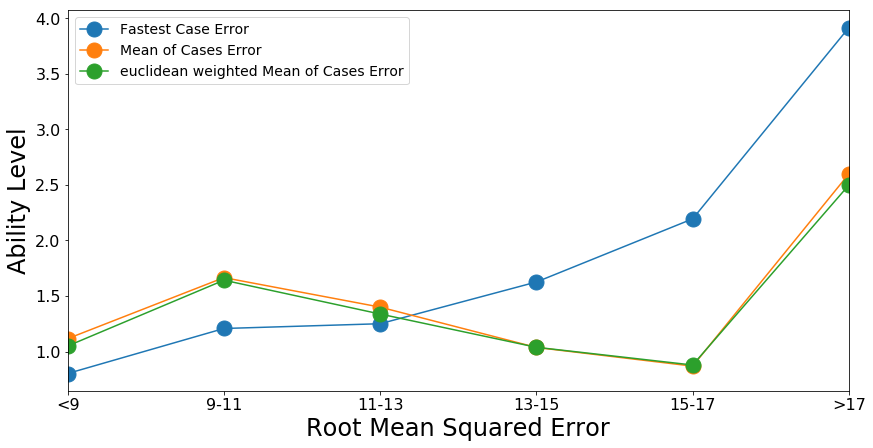

In [39]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra4 = pd.DataFrame({'Mean of Cases Error': mean2, 'Fastest Case Error': best2, 'euclidean weighted Mean of Cases Error': euc2}, index=index)
ax = gra4.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.set_ylabel('Ability Level', fontsize = 24)
ax.set_xlabel('Root Mean Squared Error', fontsize = 24)
ax.legend(fontsize = 14)

# Male Ability

In [40]:
maleg9 = male[(male.query_pb <= 9)]
maleg11 = male[(male.query_pb > 9) & (male.query_pb <= 11)]
maleg13 = male[(male.query_pb > 11) & (male.query_pb <= 13)]
maleg15 = male[(male.query_pb > 13) & (male.query_pb <= 15)]
maleg17 = male[(male.query_pb > 15) & (male.query_pb <= 17)]
maleg19 = male[(male.query_pb > 17)]

## Bin counts

In [41]:
maleg9count = maleg9.shape[0]
maleg11count = maleg11.shape[0]
maleg13count = maleg13.shape[0]
maleg15count = maleg15.shape[0]
maleg17count = maleg17.shape[0]
maleg19count = maleg19.shape[0]

In [42]:
print(maleg9count) 
print(maleg11count )
print(maleg13count)
print(maleg15count) 
print(maleg17count) 
print(maleg19count) 

68
146
307
467
443
73


In [43]:
count1 = [maleg9count, maleg11count, maleg13count, maleg15count, maleg17count, maleg19count]

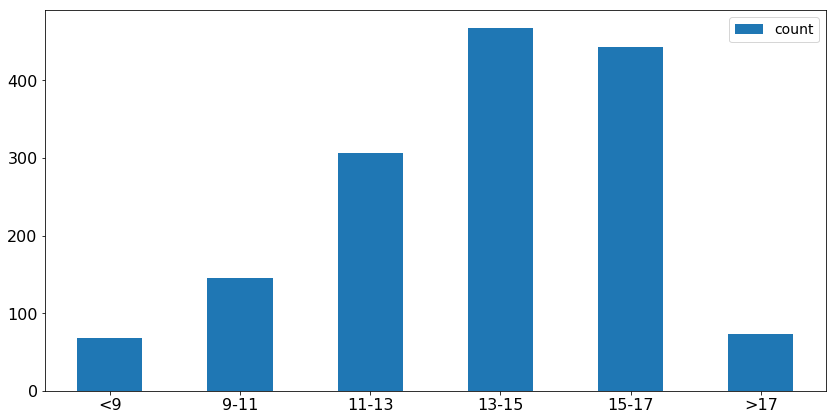

In [44]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra8 = pd.DataFrame({'count': count1}, index=index)
ax = gra8.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [45]:


maleg9B = sqrt(mean_squared_error(maleg9.query_pb, maleg9.best_pb_prediction))
maleg9M = sqrt(mean_squared_error(maleg9.query_pb, maleg9.mean_pb_average_pace))

maleg11B = sqrt(mean_squared_error(maleg11.query_pb, maleg11.best_pb_prediction))
maleg11M = sqrt(mean_squared_error(maleg11.query_pb, maleg11.mean_pb_average_pace))

maleg13B = sqrt(mean_squared_error(maleg13.query_pb, maleg13.best_pb_prediction))
maleg13M = sqrt(mean_squared_error(maleg13.query_pb, maleg13.mean_pb_average_pace))

maleg15B = sqrt(mean_squared_error(maleg15.query_pb, maleg15.best_pb_prediction))
maleg15M = sqrt(mean_squared_error(maleg15.query_pb, maleg15.mean_pb_average_pace))

maleg17B = sqrt(mean_squared_error(maleg17.query_pb, maleg17.best_pb_prediction))
maleg17M = sqrt(mean_squared_error(maleg17.query_pb, maleg17.mean_pb_average_pace))

maleg19B = sqrt(mean_squared_error(maleg19.query_pb, maleg19.best_pb_prediction))
maleg19M = sqrt(mean_squared_error(maleg19.query_pb, maleg19.mean_pb_average_pace))

maleg9W = sqrt(mean_squared_error(maleg9.query_pb, maleg9.weighted_mean))
maleg9E = sqrt(mean_squared_error(maleg9.query_pb, maleg9.euc_weighted_mean))

maleg11W = sqrt(mean_squared_error(maleg11.query_pb, maleg11.weighted_mean))
maleg11E = sqrt(mean_squared_error(maleg11.query_pb, maleg11.euc_weighted_mean))

maleg13W = sqrt(mean_squared_error(maleg13.query_pb, maleg13.weighted_mean))
maleg13E = sqrt(mean_squared_error(maleg13.query_pb, maleg13.euc_weighted_mean))

maleg15W = sqrt(mean_squared_error(maleg15.query_pb, maleg15.weighted_mean))
maleg15E = sqrt(mean_squared_error(maleg15.query_pb, maleg15.euc_weighted_mean))

maleg17W = sqrt(mean_squared_error(maleg17.query_pb, maleg17.weighted_mean))
maleg17E = sqrt(mean_squared_error(maleg17.query_pb, maleg17.euc_weighted_mean))

maleg19W = sqrt(mean_squared_error(maleg19.query_pb, maleg19.weighted_mean))
maleg19E = sqrt(mean_squared_error(maleg19.query_pb, maleg19.euc_weighted_mean))


print('Male U9 Fastest Case Error:', maleg9B)
print('Male U9 Mean of Cases Error:', maleg9M)
print('Male 9-11 Fastest Case Error:', maleg11B)
print('Male 9-11 Mean of Cases Error:', maleg11M)
print('Male 11-13 Fastest Case Error:', maleg13B)
print('Male 11-13 Mean of Cases Error:', maleg13M)
print('Male 13-15 Fastest Case Error:', maleg15B)
print('Male 13-15 Mean of Cases Error:', maleg15M)
print('Male 15-17 Fastest Case Error:', maleg17B)
print('Male 15-17 Mean of Cases Error:', maleg17M)
print('Male O17 Fastest Case Error:', maleg19B)
print('Male 017 Mean of Cases Error:', maleg19M)

Male U9 Fastest Case Error: 0.8121611590679804
Male U9 Mean of Cases Error: 1.128061939792839
Male 9-11 Fastest Case Error: 1.2700526550737905
Male 9-11 Mean of Cases Error: 1.7305060093405895
Male 11-13 Fastest Case Error: 1.249200368898583
Male 11-13 Mean of Cases Error: 1.3969449191190104
Male 13-15 Fastest Case Error: 1.5865437963899807
Male 13-15 Mean of Cases Error: 1.046737407397607
Male 15-17 Fastest Case Error: 2.216524249914666
Male 15-17 Mean of Cases Error: 0.8726048924224231
Male O17 Fastest Case Error: 3.94493323188839
Male 017 Mean of Cases Error: 2.61458865343677


###  Percentage

In [46]:
mgb9_per = ((maleg9.pb_error / maleg9.query_pb) * 100).mean()
mgm9_per = ((maleg9.mean_error / maleg9.query_pb) * 100).mean()

mgb11_per = ((maleg11.pb_error / maleg11.query_pb) * 100).mean()
mgm11_per = ((maleg11.mean_error / maleg11.query_pb) * 100).mean()

mgb13_per = ((maleg13.pb_error / maleg13.query_pb) * 100).mean()
mgm13_per = ((maleg13.mean_error / maleg13.query_pb) * 100).mean()

mgb15_per = ((maleg15.pb_error / maleg15.query_pb) * 100).mean()
mgm15_per = ((maleg15.mean_error / maleg15.query_pb) * 100).mean()

mgb17_per = ((maleg17.pb_error / maleg17.query_pb) * 100).mean()
mgm17_per = ((maleg17.mean_error / maleg17.query_pb) * 100).mean()

mgb19_per = ((maleg19.pb_error / maleg19.query_pb) * 100).mean()
mgm19_per = ((maleg19.mean_error / maleg19.query_pb) * 100).mean()

print(mgb9_per)
print(mgm9_per)
print(mgb11_per)
print(mgm11_per)
print(mgb13_per)
print(mgm13_per)
print(mgb15_per)
print(mgm15_per)
print(mgb17_per)
print(mgm17_per)
print(mgb19_per)
print(mgm19_per)

5.62903499950322
8.366918308697487
8.99085828470628
11.67925722174375
8.124368823233008
8.62978027491923
8.979627320348436
6.2621159665253865
11.53757086668433
4.12090810594769
19.544541588935385
12.02057724089849


In [47]:
mean3 = [maleg9M, maleg11M, maleg13M, maleg15M, maleg17M, maleg19M]
best3 = [maleg9B, maleg11B, maleg13B, maleg15B, maleg17B, maleg19B]
wei3 = [maleg9W, maleg11W, maleg13W, maleg15W, maleg17W, maleg19W]
euc3 = [maleg9E, maleg11E, maleg13E, maleg15E, maleg17E, maleg19E]

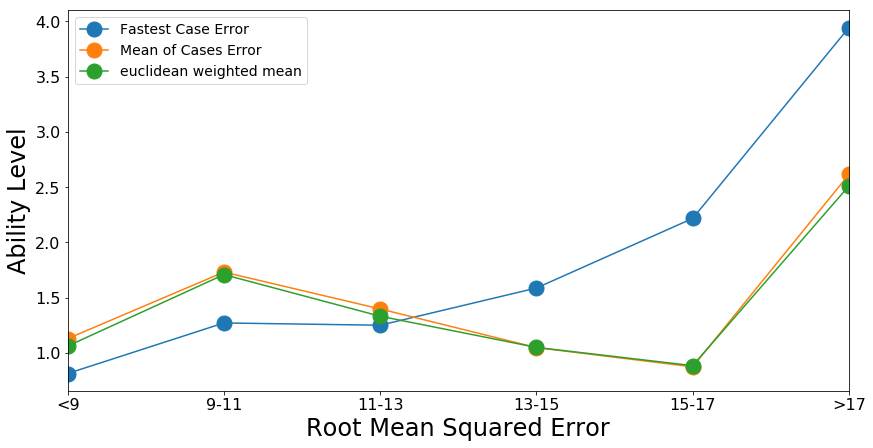

In [48]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra5 = pd.DataFrame({'Mean of Cases Error': mean3, 'Fastest Case Error': best3,  'euclidean weighted mean': euc3}, index=index)
ax = gra5.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.set_ylabel('Ability Level', fontsize = 24)
ax.set_xlabel('Root Mean Squared Error', fontsize = 24)
ax.legend(fontsize = 14)

# Female Ability

In [49]:
femaleg9 = female[(female.query_pb <= 9)]
femaleg11 = female[(female.query_pb > 9) & (female.query_pb <= 11)]
femaleg13 = female[(female.query_pb > 11) & (female.query_pb <= 13)]
femaleg15 = female[(female.query_pb > 13) & (female.query_pb <= 15)]
femaleg17 = female[(female.query_pb > 15) & (female.query_pb <= 17)]
femaleg19 = female[(female.query_pb > 17)]

## Bin counts

In [50]:
femaleg9count = femaleg9.shape[0]
femaleg11count = femaleg11.shape[0]
femaleg13count = femaleg13.shape[0]
femaleg15count = femaleg15.shape[0]
femaleg17count = femaleg17.shape[0]
femaleg19count = femaleg19.shape[0]

In [51]:
print(femaleg9count) 
print(femaleg11count )
print(femaleg13count)
print(femaleg15count) 
print(femaleg17count) 
print(femaleg19count) 

2
22
14
39
26
4


In [52]:
count1 = [femaleg9count, femaleg11count, femaleg13count, femaleg15count, femaleg17count, femaleg19count]

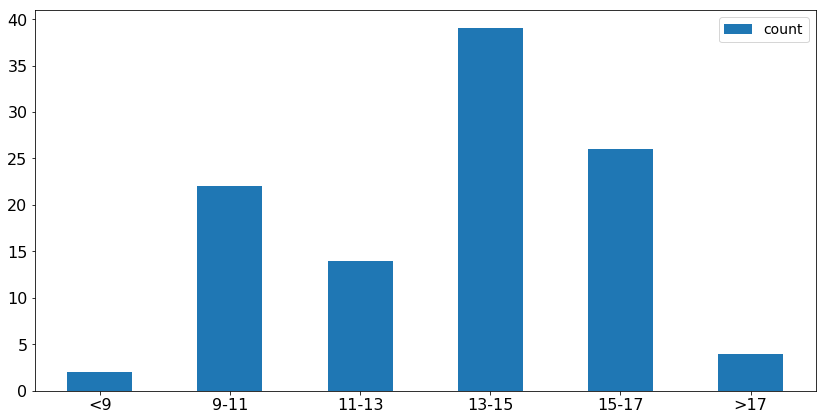

In [53]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra9 = pd.DataFrame({'count': count1}, index=index)
ax = gra9.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [54]:


femaleg9B = sqrt(mean_squared_error(femaleg9.query_pb, femaleg9.best_pb_prediction))
femaleg9M = sqrt(mean_squared_error(femaleg9.query_pb, femaleg9.mean_pb_average_pace))

femaleg11B = sqrt(mean_squared_error(femaleg11.query_pb, femaleg11.best_pb_prediction))
femaleg11M = sqrt(mean_squared_error(femaleg11.query_pb, femaleg11.mean_pb_average_pace))

femaleg13B = sqrt(mean_squared_error(femaleg13.query_pb, femaleg13.best_pb_prediction))
femaleg13M = sqrt(mean_squared_error(femaleg13.query_pb, femaleg13.mean_pb_average_pace))

femaleg15B = sqrt(mean_squared_error(femaleg15.query_pb, femaleg15.best_pb_prediction))
femaleg15M = sqrt(mean_squared_error(femaleg15.query_pb, femaleg15.mean_pb_average_pace))

femaleg17B = sqrt(mean_squared_error(femaleg17.query_pb, femaleg17.best_pb_prediction))
femaleg17M = sqrt(mean_squared_error(femaleg17.query_pb, femaleg17.mean_pb_average_pace))

femaleg19B = sqrt(mean_squared_error(femaleg19.query_pb, femaleg19.best_pb_prediction))
femaleg19M = sqrt(mean_squared_error(femaleg19.query_pb, femaleg19.mean_pb_average_pace))

femaleg9W = sqrt(mean_squared_error(femaleg9.query_pb, femaleg9.weighted_mean))
femaleg9E = sqrt(mean_squared_error(femaleg9.query_pb, femaleg9.euc_weighted_mean))

femaleg11W = sqrt(mean_squared_error(femaleg11.query_pb, femaleg11.weighted_mean))
femaleg11E = sqrt(mean_squared_error(femaleg11.query_pb, femaleg11.euc_weighted_mean))

femaleg13W = sqrt(mean_squared_error(femaleg13.query_pb, femaleg13.weighted_mean))
femaleg13E = sqrt(mean_squared_error(femaleg13.query_pb, femaleg13.euc_weighted_mean))

femaleg15W = sqrt(mean_squared_error(femaleg15.query_pb, femaleg15.weighted_mean))
femaleg15E = sqrt(mean_squared_error(femaleg15.query_pb, femaleg15.euc_weighted_mean))

femaleg17W = sqrt(mean_squared_error(femaleg17.query_pb, femaleg17.weighted_mean))
femaleg17E = sqrt(mean_squared_error(femaleg17.query_pb, femaleg17.euc_weighted_mean))

femaleg19W = sqrt(mean_squared_error(femaleg19.query_pb, femaleg19.weighted_mean))
femaleg19E = sqrt(mean_squared_error(femaleg19.query_pb, femaleg19.euc_weighted_mean))


print('female U9 Fastest Case Error:', femaleg9B)
print('female U9 Mean of Cases Error:', femaleg9M)
print('female 9-11 Fastest Case Error:', femaleg11B)
print('female 9-11 Mean of Cases Error:', femaleg11M)
print('female 11-13 Fastest Case Error:', femaleg13B)
print('female 11-13 Mean of Cases Error:', femaleg13M)
print('female 13-15 Fastest Case Error:', femaleg15B)
print('female 13-15 Mean of Cases Error:', femaleg15M)
print('female 15-17 Fastest Case Error:', femaleg17B)
print('female 15-17 Mean of Cases Error:', femaleg17M)
print('female O17 Fastest Case Error:', femaleg19B)
print('female 017 Mean of Cases Error:', femaleg19M)

female U9 Fastest Case Error: 0.32216379354785596
female U9 Mean of Cases Error: 0.5843629381937183
female 9-11 Fastest Case Error: 0.6564153112401206
female 9-11 Mean of Cases Error: 1.145972948071746
female 11-13 Fastest Case Error: 1.2785609622187324
female 11-13 Mean of Cases Error: 1.4648084505145473
female 13-15 Fastest Case Error: 2.0428235596782933
female 13-15 Mean of Cases Error: 0.9091749405052831
female 15-17 Fastest Case Error: 1.7842053706119008
female 15-17 Mean of Cases Error: 0.8000303246967748
female O17 Fastest Case Error: 3.362505484569087
female 017 Mean of Cases Error: 2.312575471410028


In [55]:
fgb9_per = ((femaleg9.pb_error / femaleg9.query_pb) * 100).mean()
fgm9_per = ((femaleg9.mean_error / femaleg9.query_pb) * 100).mean()

fgb11_per = ((femaleg11.pb_error / femaleg11.query_pb) * 100).mean()
fgm11_per = ((femaleg11.mean_error / femaleg11.query_pb) * 100).mean()

fgb13_per = ((femaleg13.pb_error / femaleg13.query_pb) * 100).mean()
fgm13_per = ((femaleg13.mean_error / femaleg13.query_pb) * 100).mean()

fgb15_per = ((femaleg15.pb_error / femaleg15.query_pb) * 100).mean()
fgm15_per = ((femaleg15.mean_error / femaleg15.query_pb) * 100).mean()

fgb17_per = ((femaleg17.pb_error / femaleg17.query_pb) * 100).mean()
fgm17_per = ((femaleg17.mean_error / femaleg17.query_pb) * 100).mean()

fgb19_per = ((femaleg19.pb_error / femaleg19.query_pb) * 100).mean()
fgm19_per = ((femaleg19.mean_error / femaleg19.query_pb) * 100).mean()

print(fgb9_per)
print(fgm9_per)
print(fgb11_per)
print(fgm11_per)
print(fgb13_per)
print(fgm13_per)
print(fgb15_per)
print(fgm15_per)
print(fgb17_per)
print(fgm17_per)
print(fgb19_per)
print(fgm19_per)

3.3190845080412945
6.441100553071433
4.969992728621368
7.009462094375005
7.917010168198108
8.415002240994976
11.372847748763478
5.405957707722041
8.805656401825697
3.642216225759324
17.806455770459394
12.40861316462822


In [56]:
mean4 = [femaleg9M, femaleg11M, femaleg13M, femaleg15M, femaleg17M, femaleg19M]
best4 = [femaleg9B, femaleg11B, femaleg13B, femaleg15B, femaleg17B, femaleg19B]
wei4 = [femaleg9W, femaleg11W, femaleg13W, femaleg15W, femaleg17W, femaleg19W]
euc4 = [femaleg9E, femaleg11E, femaleg13E, femaleg15E, femaleg17E, femaleg19E]

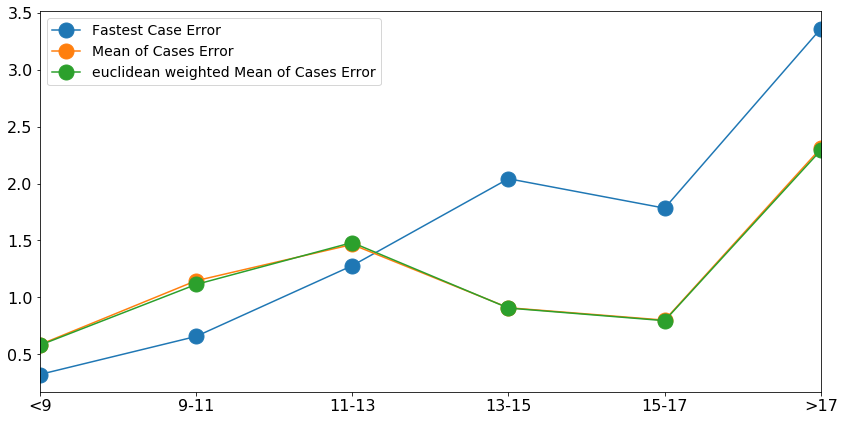

In [57]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra6 = pd.DataFrame({'Mean of Cases Error': mean4, 'Fastest Case Error': best4, 'euclidean weighted Mean of Cases Error': euc4}, index=index)
ax = gra6.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

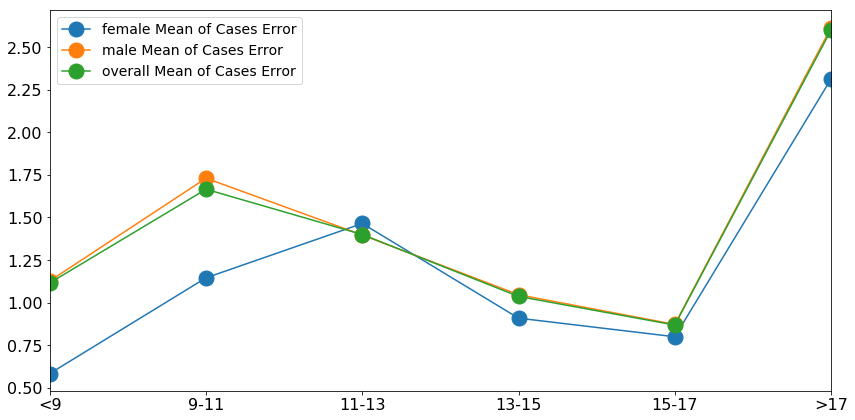

In [58]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra6 = pd.DataFrame({'female Mean of Cases Error': mean4, 'male Mean of Cases Error': mean3, 'overall Mean of Cases Error': mean2}, index=index)
ax = gra6.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

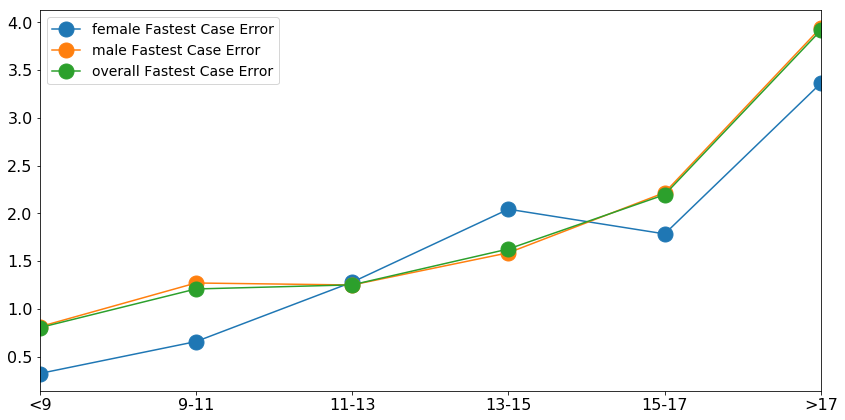

In [59]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra10 = pd.DataFrame({'female Fastest Case Error': best4, 'male Fastest Case Error': best3, 'overall Fastest Case Error': best2}, index=index)
ax = gra10.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

# Males vs Females

In [60]:
mean4 = [femaleg9M, femaleg11M, femaleg13M, femaleg15M, femaleg17M, femaleg19M]
best4 = [femaleg9B, femaleg11B, femaleg13B, femaleg15B, femaleg17B, femaleg19B]
euc4 = [femaleg9E, femaleg11E, femaleg13E, femaleg15E, femaleg17E, femaleg19E]

In [61]:
mean3 = [maleg9M, maleg11M, maleg13M, maleg15M, maleg17M, maleg19M]
best3 = [maleg9B, maleg11B, maleg13B, maleg15B, maleg17B, maleg19B]
euc3 = [maleg9E, maleg11E, maleg13E, maleg15E, maleg17E, maleg19E]

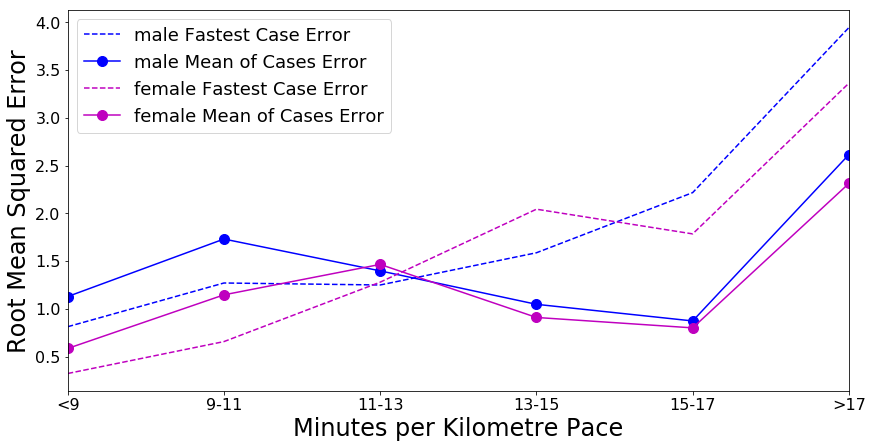

In [62]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra5 = pd.DataFrame({'male Mean of Cases Error': mean3, 'male Fastest Case Error': best3}, index=index)
gra15 = pd.DataFrame({'female Mean of Cases Error': mean4, 'female Fastest Case Error': best4}, index=index)
styles1 = ['b--','bo-']
styles2 = ['m--','mo-']
fig, ax = plt.subplots()
gra5.plot(style=styles1, ax=ax, figsize = (14, 7), fontsize = 16, ms=10)
gra15.plot(style=styles2, ax=ax, figsize = (14, 7), fontsize = 16, ms=10)
ax.set_ylabel('Root Mean Squared Error', fontsize = 24)
ax.set_xlabel('Minutes per Kilometre Pace', fontsize = 24)
ax.legend(fontsize = 18)
#testdataframe2.plot(style=styles2, ax=ax)

In [63]:
mean8 = [fgm9_per, fgm11_per, fgm13_per, fgm15_per, fgm17_per, fgm19_per]
best8 = [fgb9_per, fgb11_per, fgb13_per, fgb15_per, fgb17_per, fgb19_per]

In [64]:
mean9 = [mgm9_per, mgm11_per, mgm13_per, mgm15_per, mgm17_per, mgm19_per]
best9 = [mgb9_per, mgb11_per, mgb13_per, mgb15_per, mgb17_per, mgb19_per]

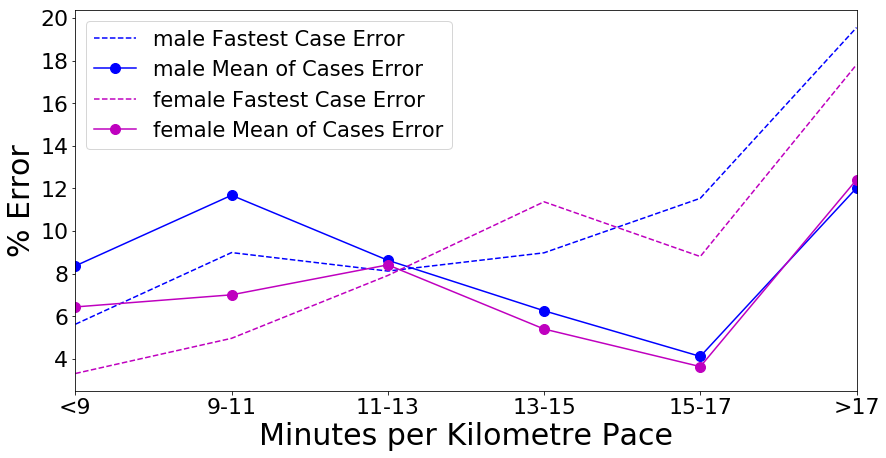

In [65]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra9 = pd.DataFrame({'male Mean of Cases Error': mean9, 'male Fastest Case Error': best9}, index=index)
gra8 = pd.DataFrame({'female Mean of Cases Error': mean8, 'female Fastest Case Error': best8}, index=index)
styles1 = ['b--','bo-']
styles2 = ['m--','mo-']
fig, ax = plt.subplots()
gra9.plot(style=styles1, ax=ax, figsize = (14, 7), fontsize = 22, ms=10)
gra8.plot(style=styles2, ax=ax, figsize = (14, 7), fontsize = 22, ms=10)
ax.set_ylabel('% Error', fontsize = 30)
ax.set_xlabel('Minutes per Kilometre Pace', fontsize = 30)
ax.legend(fontsize = 21)
#testdataframe2.plot(style=styles2, ax=ax)

For the more elite runners, the fastest case in their case base produced lower errors. This continues
until the 11-13 minutes per kilometre group, where the mean of cases error and fastest case error
are almost equal. For the slower runners, the mean of cases error produces better predictions with
a lower percentage error. This peaks at 4% mean of cases error for both the male and female
runners who ran between 15 and 17 minutes per kilometre. After 17 minutes per kilometre, the
results become quite poor, especially for fastest case error.


In [66]:
mean4 = [femaleg9M, femaleg11M, femaleg13M, femaleg15M, femaleg17M, femaleg19M]
best4 = [femaleg9B, femaleg11B, femaleg13B, femaleg15B, femaleg17B, femaleg19B]
euc4 = [femaleg9E, femaleg11E, femaleg13E, femaleg15E, femaleg17E, femaleg19E]

In [67]:
mean3 = [maleg9M, maleg11M, maleg13M, maleg15M, maleg17M, maleg19M]
best3 = [maleg9B, maleg11B, maleg13B, maleg15B, maleg17B, maleg19B]
euc3 = [maleg9E, maleg11E, maleg13E, maleg15E, maleg17E, maleg19E]

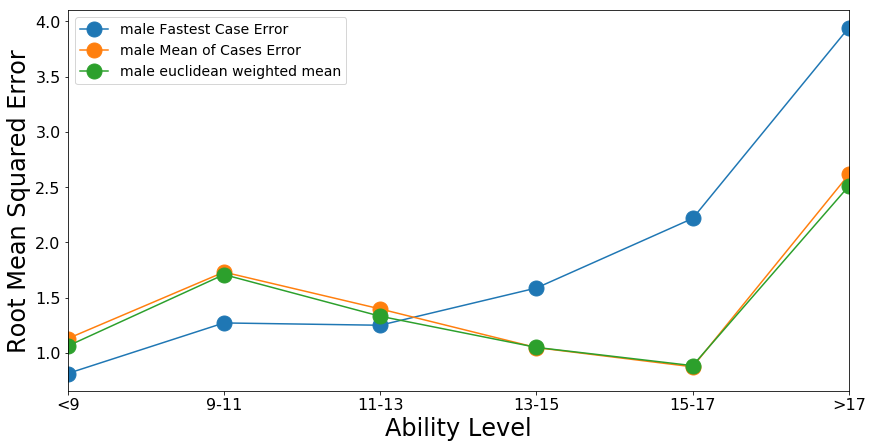

In [68]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra5 = pd.DataFrame({'male Mean of Cases Error': mean3, 'male Fastest Case Error': best3,  'male euclidean weighted mean': euc3}, index=index)
ax = gra5.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.set_ylabel('Root Mean Squared Error', fontsize = 24)
ax.set_xlabel('Ability Level', fontsize = 24)
ax.legend(fontsize = 14)

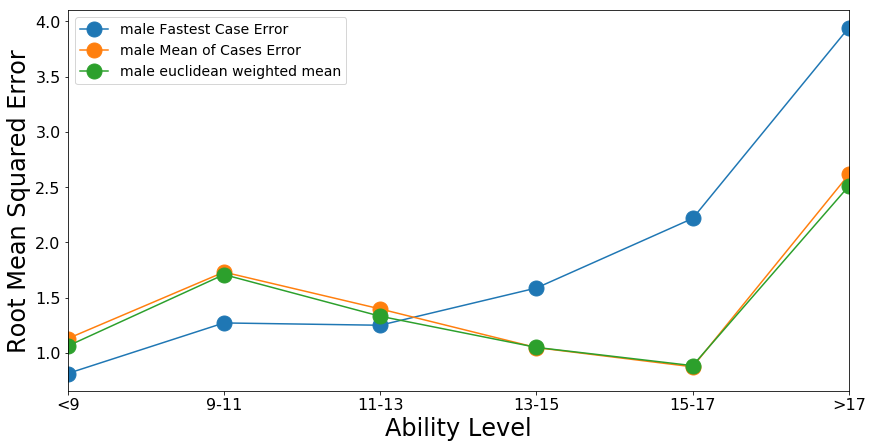

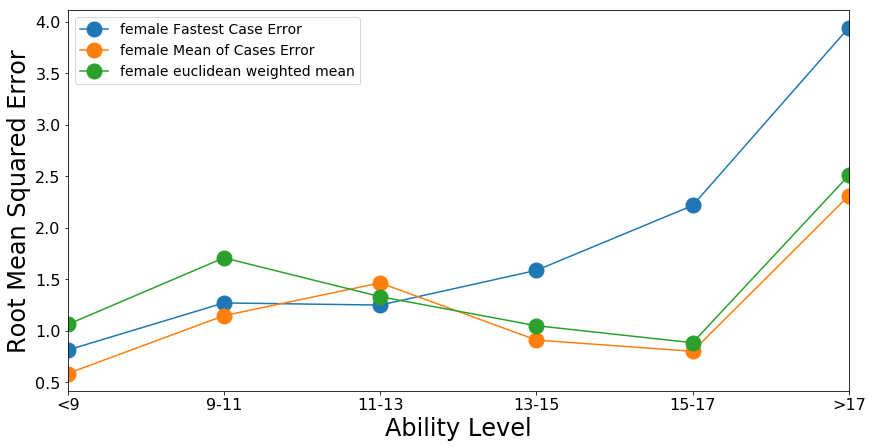

In [69]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra5 = pd.DataFrame({'male Mean of Cases Error': mean3, 'male Fastest Case Error': best3,  'male euclidean weighted mean': euc3}, index=index)
styles = ['bs-','ro-','y^-']
linewidths = [2, 1, 4]
ax = gra5.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.set_ylabel('Root Mean Squared Error', fontsize = 24)
ax.set_xlabel('Ability Level', fontsize = 24)
ax.legend(fontsize = 14)
gra15 = pd.DataFrame({'female Mean of Cases Error': mean4, 'female Fastest Case Error': best3,  'female euclidean weighted mean': euc3}, index=index)
ax1 = gra15.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax1.set_ylabel('Root Mean Squared Error', fontsize = 24)
ax1.set_xlabel('Ability Level', fontsize = 24)
ax1.legend(fontsize = 14)

# Categorical Ability

## Senior Men Ability

In [70]:
sg9 = sen[(sen.query_pb <= 9)]
sg11 = sen[(sen.query_pb > 9) & (sen.query_pb <= 11)]
sg13 = sen[(sen.query_pb > 11) & (sen.query_pb <= 13)]
sg15 = sen[(sen.query_pb > 13) & (sen.query_pb <= 15)]
sg17 = sen[(sen.query_pb > 15) & (sen.query_pb <= 17)]
sg19 = sen[(sen.query_pb > 17)]

### Bin counts

In [71]:
sg9count = sg9.shape[0]
sg11count = sg11.shape[0]
sg13count = sg13.shape[0]
sg15count = sg15.shape[0]
sg17count = sg17.shape[0]
sg19count = sg19.shape[0]

In [72]:
count2 = [sg9count, sg11count, sg13count, sg15count, sg17count, sg19count]

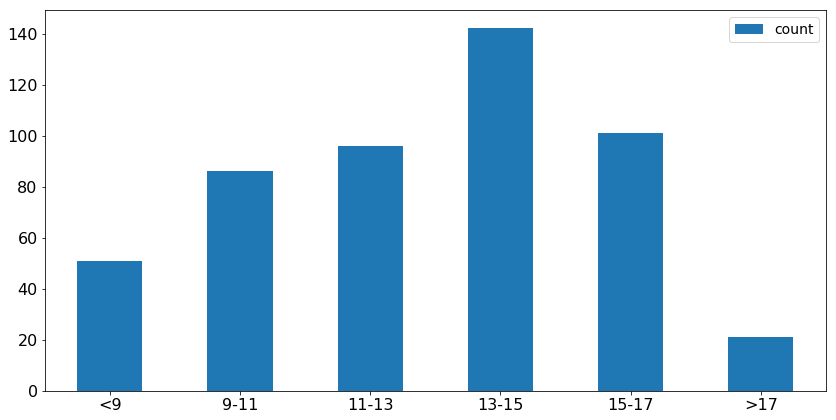

In [73]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count2}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [74]:


sg9B = sqrt(mean_squared_error(sg9.query_pb, sg9.best_pb_prediction))
sg9M = sqrt(mean_squared_error(sg9.query_pb, sg9.mean_pb_average_pace))

sg11B = sqrt(mean_squared_error(sg11.query_pb, sg11.best_pb_prediction))
sg11M = sqrt(mean_squared_error(sg11.query_pb, sg11.mean_pb_average_pace))

sg13B = sqrt(mean_squared_error(sg13.query_pb, sg13.best_pb_prediction))
sg13M = sqrt(mean_squared_error(sg13.query_pb, sg13.mean_pb_average_pace))

sg15B = sqrt(mean_squared_error(sg15.query_pb, sg15.best_pb_prediction))
sg15M = sqrt(mean_squared_error(sg15.query_pb, sg15.mean_pb_average_pace))

sg17B = sqrt(mean_squared_error(sg17.query_pb, sg17.best_pb_prediction))
sg17M = sqrt(mean_squared_error(sg17.query_pb, sg17.mean_pb_average_pace))

sg19B = sqrt(mean_squared_error(sg19.query_pb, sg19.best_pb_prediction))
sg19M = sqrt(mean_squared_error(sg19.query_pb, sg19.mean_pb_average_pace))


print('Sen U9 Fastest Case Error:', sg9B)
print('Sen U9 Mean of Cases Error:', sg9M)
print('Sen 9-11 Fastest Case Error:', sg11B)
print('Sen 9-11 Mean of Cases Error:', sg11M)
print('Sen 11-13 Fastest Case Error:', sg13B)
print('Sen 11-13 Mean of Cases Error:', sg13M)
print('Sen 13-15 Fastest Case Error:', sg15B)
print('Sen 13-15 Mean of Cases Error:', sg15M)
print('Sen 15-17 Fastest Case Error:', sg17B)
print('Sen 15-17 Mean of Cases Error:', sg17M)
print('Sen O17 Fastest Case Error:', sg19B)
print('Sen 017 Mean of Cases Error:', sg19M)

Sen U9 Fastest Case Error: 0.8906424387212438
Sen U9 Mean of Cases Error: 1.2412779286107152
Sen 9-11 Fastest Case Error: 1.4215865642797745
Sen 9-11 Mean of Cases Error: 1.9204787834220185
Sen 11-13 Fastest Case Error: 1.4941062267008254
Sen 11-13 Mean of Cases Error: 1.4792866861843483
Sen 13-15 Fastest Case Error: 2.0014280176308947
Sen 13-15 Mean of Cases Error: 1.0328388237898516
Sen 15-17 Fastest Case Error: 2.994019394559006
Sen 15-17 Mean of Cases Error: 1.0097126289460494
Sen O17 Fastest Case Error: 4.344817460802816
Sen 017 Mean of Cases Error: 2.361196339084957


In [75]:
mean5 = [sg9M, sg11M, sg13M, sg15M, sg17M, sg19M]
best5 = [sg9B, sg11B, sg13B, sg15B, sg17B, sg19B]

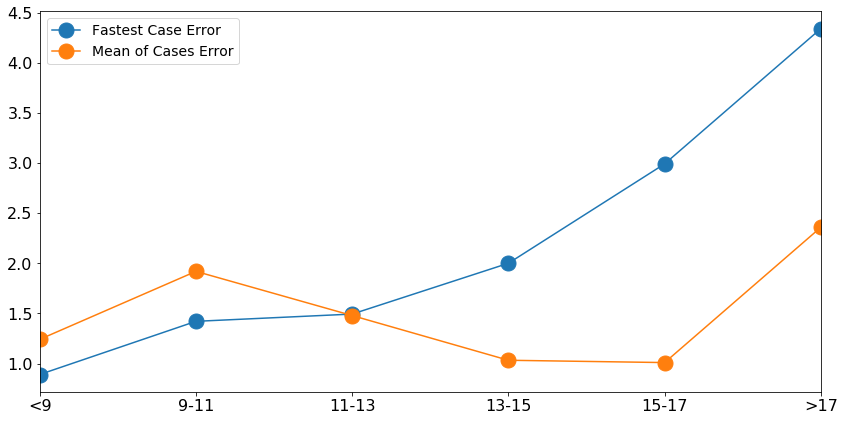

In [76]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra12 = pd.DataFrame({'Mean of Cases Error': mean5, 'Fastest Case Error': best5}, index=index)
ax = gra12.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Men 1 Ability

In [77]:
mg9 = mas[(mas.query_pb <= 9)]
mg11 = mas[(mas.query_pb > 9) & (mas.query_pb <= 11)]
mg13 = mas[(mas.query_pb > 11) & (mas.query_pb <= 13)]
mg15 = mas[(mas.query_pb > 13) & (mas.query_pb <= 15)]
mg17 = mas[(mas.query_pb > 15) & (mas.query_pb <= 17)]
mg19 = mas[(mas.query_pb > 17)]

### Bin counts

In [78]:
mg9count = mg9.shape[0]
mg11count = mg11.shape[0]
mg13count = mg13.shape[0]
mg15count = mg15.shape[0]
mg17count = mg17.shape[0]
mg19count = mg19.shape[0]

In [79]:
count3 = [mg9count, mg11count, mg13count, mg15count, mg17count, mg19count]

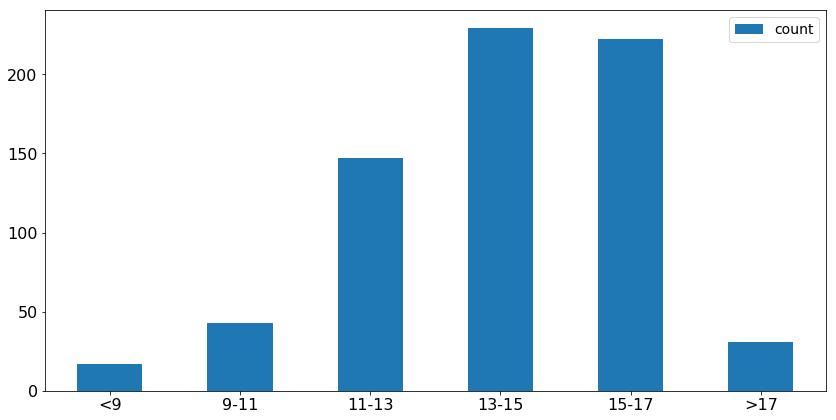

In [80]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count3}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [81]:


mg9B = sqrt(mean_squared_error(mg9.query_pb, mg9.best_pb_prediction))
mg9M = sqrt(mean_squared_error(mg9.query_pb, mg9.mean_pb_average_pace))

mg11B = sqrt(mean_squared_error(mg11.query_pb, mg11.best_pb_prediction))
mg11M = sqrt(mean_squared_error(mg11.query_pb, mg11.mean_pb_average_pace))

mg13B = sqrt(mean_squared_error(mg13.query_pb, mg13.best_pb_prediction))
mg13M = sqrt(mean_squared_error(mg13.query_pb, mg13.mean_pb_average_pace))

mg15B = sqrt(mean_squared_error(mg15.query_pb, mg15.best_pb_prediction))
mg15M = sqrt(mean_squared_error(mg15.query_pb, mg15.mean_pb_average_pace))

mg17B = sqrt(mean_squared_error(mg17.query_pb, mg17.best_pb_prediction))
mg17M = sqrt(mean_squared_error(mg17.query_pb, mg17.mean_pb_average_pace))

mg19B = sqrt(mean_squared_error(mg19.query_pb, mg19.best_pb_prediction))
mg19M = sqrt(mean_squared_error(mg19.query_pb, mg19.mean_pb_average_pace))


print('Mas U9 Fastest Case Error:', mg9B)
print('Mas U9 Mean of Cases Error:', mg9M)
print('Mas 9-11 Fastest Case Error:', mg11B)
print('Mas 9-11 Mean of Cases Error:', mg11M)
print('Mas 11-13 Fastest Case Error:', mg13B)
print('Mas 11-13 Mean of Cases Error:', mg13M)
print('Mas 13-15 Fastest Case Error:', mg15B)
print('Mas 13-15 Mean of Cases Error:', mg15M)
print('Mas 15-17 Fastest Case Error:', mg17B)
print('Mas 15-17 Mean of Cases Error:', mg17M)
print('Mas O17 Fastest Case Error:', mg19B)
print('Mas 017 Mean of Cases Error:', mg19M)

Mas U9 Fastest Case Error: 0.5086168815922328
Mas U9 Mean of Cases Error: 0.6839461030435143
Mas 9-11 Fastest Case Error: 1.1418014304417272
Mas 9-11 Mean of Cases Error: 1.4473531233764496
Mas 11-13 Fastest Case Error: 1.1030899435040318
Mas 11-13 Mean of Cases Error: 1.317475927659155
Mas 13-15 Fastest Case Error: 1.2537954173766068
Mas 13-15 Mean of Cases Error: 1.0565099595553449
Mas 15-17 Fastest Case Error: 1.9540358660782786
Mas 15-17 Mean of Cases Error: 0.811983199895641
Mas O17 Fastest Case Error: 3.319270565676563
Mas 017 Mean of Cases Error: 2.295975049383453


In [82]:
mean6 = [mg9M, mg11M, mg13M, mg15M, mg17M, mg19M]
best6 = [mg9B, mg11B, mg13B, mg15B, mg17B, mg19B]

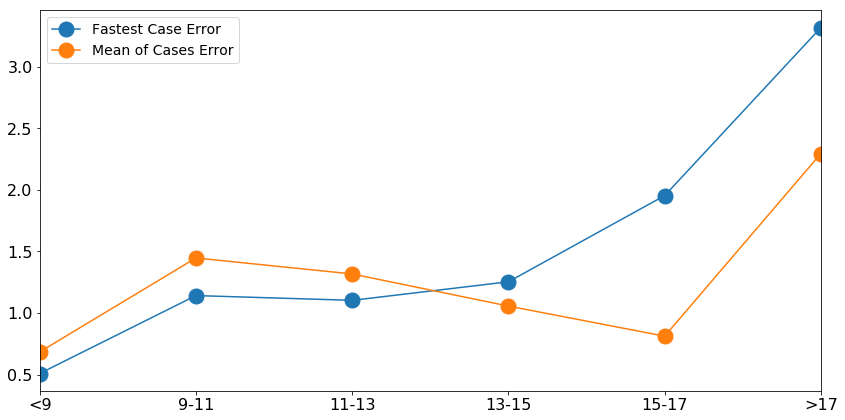

In [83]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra13 = pd.DataFrame({'Mean of Cases Error': mean6, 'Fastest Case Error': best6}, index=index)
ax = gra13.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Men 2 Ability

In [84]:
m2g9 = mas2[(mas2.query_pb <= 9)]
m2g11 = mas2[(mas2.query_pb > 9) & (mas2.query_pb <= 11)]
m2g13 = mas2[(mas2.query_pb > 11) & (mas2.query_pb <= 13)]
m2g15 = mas2[(mas2.query_pb > 13) & (mas2.query_pb <= 15)]
m2g17 = mas2[(mas2.query_pb > 15) & (mas2.query_pb <= 17)]
m2g19 = mas2[(mas2.query_pb > 17)]

### Bin counts

In [85]:
m2g9count = m2g9.shape[0]
m2g11count = m2g11.shape[0]
m2g13count = m2g13.shape[0]
m2g15count = m2g15.shape[0]
m2g17count = m2g17.shape[0]
m2g19count = m2g19.shape[0]

In [86]:
count3 = [m2g9count, m2g11count, m2g13count, m2g15count, m2g17count, m2g19count]

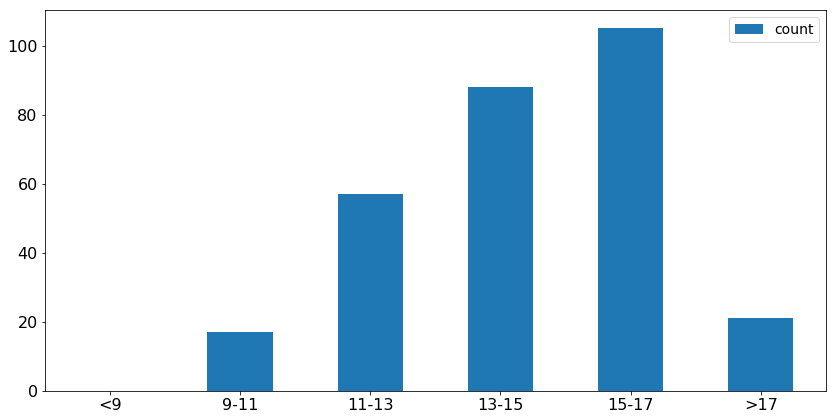

In [87]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count3}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [88]:

#m2g9B = sqrt(mean_squared_error(m2g9.query_pb, m2g9.best_pb_prediction))
#m2g9M = sqrt(mean_squared_error(m2g9.query_pb, m2g9.mean_pb_average_pace))

m2g11B = sqrt(mean_squared_error(m2g11.query_pb, m2g11.best_pb_prediction))
m2g11M = sqrt(mean_squared_error(m2g11.query_pb, m2g11.mean_pb_average_pace))

m2g13B = sqrt(mean_squared_error(m2g13.query_pb, m2g13.best_pb_prediction))
m2g13M = sqrt(mean_squared_error(m2g13.query_pb, m2g13.mean_pb_average_pace))

m2g15B = sqrt(mean_squared_error(m2g15.query_pb, m2g15.best_pb_prediction))
m2g15M = sqrt(mean_squared_error(m2g15.query_pb, m2g15.mean_pb_average_pace))

m2g17B = sqrt(mean_squared_error(m2g17.query_pb, m2g17.best_pb_prediction))
m2g17M = sqrt(mean_squared_error(m2g17.query_pb, m2g17.mean_pb_average_pace))

m2g19B = sqrt(mean_squared_error(m2g19.query_pb, m2g19.best_pb_prediction))
m2g19M = sqrt(mean_squared_error(m2g19.query_pb, m2g19.mean_pb_average_pace))


#print('Mas2 U9 Fastest Case Error:', m2g9B)
#print('Mas2 U9 Mean of Cases Error:', m2g9M)
print('Mas2 9-11 Fastest Case Error:', m2g11B)
print('Mas2 9-11 Mean of Cases Error:', m2g11M)
print('Mas2 11-13 Fastest Case Error:', m2g13B)
print('Mas2 11-13 Mean of Cases Error:', m2g13M)
print('Mas2 13-15 Fastest Case Error:', m2g15B)
print('Mas2 13-15 Mean of Cases Error:', m2g15M)
print('Mas2 15-17 Fastest Case Error:', m2g17B)
print('Mas2 15-17 Mean of Cases Error:', m2g17M)
print('Mas2 O17 Fastest Case Error:', m2g19B)
print('Mas2 017 Mean of Cases Error:', m2g19M)

Mas2 9-11 Fastest Case Error: 0.5762585353520693
Mas2 9-11 Mean of Cases Error: 1.3273765405891496
Mas2 11-13 Fastest Case Error: 1.2099189216659048
Mas2 11-13 Mean of Cases Error: 1.5105624341737713
Mas2 13-15 Fastest Case Error: 1.6067878131253184
Mas2 13-15 Mean of Cases Error: 1.055288898226842
Mas2 15-17 Fastest Case Error: 1.98200356561473
Mas2 15-17 Mean of Cases Error: 0.8880304453973298
Mas2 O17 Fastest Case Error: 4.353935740286242
Mas2 017 Mean of Cases Error: 3.225911712492026


In [89]:
mean7 = [ m2g11M, m2g13M, m2g15M, m2g17M, m2g19M]
best7 = [ m2g11B, m2g13B, m2g15B, m2g17B, m2g19B]

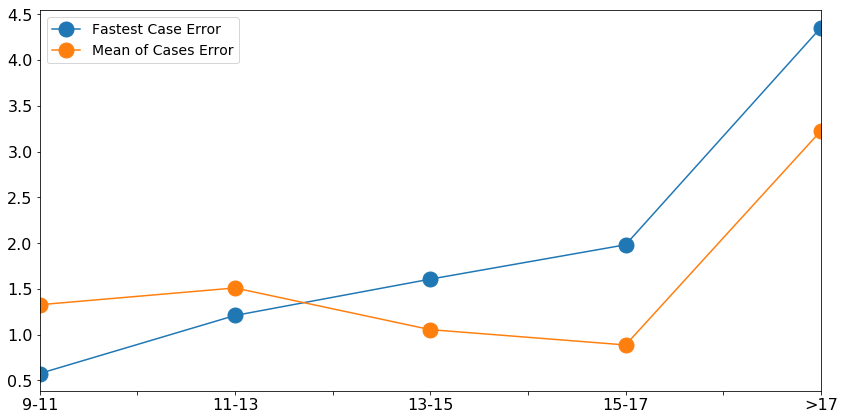

In [90]:
index = [ '9-11', '11-13', '13-15', '15-17', '>17']
gra14 = pd.DataFrame({'Mean of Cases Error': mean7, 'Fastest Case Error': best7}, index=index)
ax = gra14.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Men 3 Ability

In [91]:
m3g9 = mas3[(mas3.query_pb <= 9)]
m3g11 = mas3[(mas3.query_pb > 9) & (mas3.query_pb <= 11)]
m3g13 = mas3[(mas3.query_pb > 11) & (mas3.query_pb <= 13)]
m3g15 = mas3[(mas3.query_pb > 13) & (mas3.query_pb <= 15)]
m3g17 = mas3[(mas3.query_pb > 15) & (mas3.query_pb <= 17)]
m3g19 = mas3[(mas3.query_pb > 17)]

### Bin counts

In [92]:
m3g9count = m3g9.shape[0]
m3g11count = m3g11.shape[0]
m3g13count = m3g13.shape[0]
m3g15count = m3g15.shape[0]
m3g17count = m3g17.shape[0]
m3g19count = m3g19.shape[0]

In [93]:
count4 = [m3g9count, m3g11count, m3g13count, m3g15count, m3g17count, m3g19count]

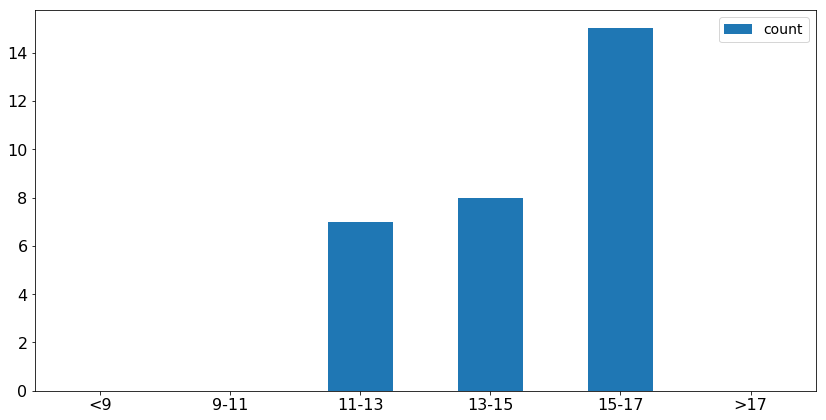

In [94]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count4}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [95]:

#m3g9B = sqrt(mean_squared_error(m3g9.query_pb, m3g9.best_pb_prediction))
#m3g9M = sqrt(mean_squared_error(m3g9.query_pb, m3g9.mean_pb_average_pace))

#m3g11B = sqrt(mean_squared_error(m3g11.query_pb, m3g11.best_pb_prediction))
#m3g11M = sqrt(mean_squared_error(m3g11.query_pb, m3g11.mean_pb_average_pace))

m3g13B = sqrt(mean_squared_error(m3g13.query_pb, m3g13.best_pb_prediction))
m3g13M = sqrt(mean_squared_error(m3g13.query_pb, m3g13.mean_pb_average_pace))

m3g15B = sqrt(mean_squared_error(m3g15.query_pb, m3g15.best_pb_prediction))
m3g15M = sqrt(mean_squared_error(m3g15.query_pb, m3g15.mean_pb_average_pace))

m3g17B = sqrt(mean_squared_error(m3g17.query_pb, m3g17.best_pb_prediction))
m3g17M = sqrt(mean_squared_error(m3g17.query_pb, m3g17.mean_pb_average_pace))

#m3g19B = sqrt(mean_squared_error(m3g19.query_pb, m3g19.best_pb_prediction))
#m3g19M = sqrt(mean_squared_error(m3g19.query_pb, m3g19.mean_pb_average_pace))


#print('Mas3 U9 Fastest Case Error:', m3g9B)
#print('Mas3 U9 Mean of Cases Error:', m3g9M)
#print('Mas3 9-11 Fastest Case Error:', m3g11B)
#print('Mas3 9-11 Mean of Cases Error:', m3g11M)
print('Mas3 11-13 Fastest Case Error:', m3g13B)
print('Mas3 11-13 Mean of Cases Error:', m3g13M)
print('Mas3 13-15 Fastest Case Error:', m3g15B)
print('Mas3 13-15 Mean of Cases Error:', m3g15M)
print('Mas3 15-17 Fastest Case Error:', m3g17B)
print('Mas3 15-17 Mean of Cases Error:', m3g17M)
#print('Mas3 O17 Fastest Case Error:', m3g19B)
#print('Mas3 017 Mean of Cases Error:', m3g19M)

Mas3 11-13 Fastest Case Error: 0.5921925061851017
Mas3 11-13 Mean of Cases Error: 0.7371987799993367
Mas3 13-15 Fastest Case Error: 1.5612505882871905
Mas3 13-15 Mean of Cases Error: 0.9069726346204455
Mas3 15-17 Fastest Case Error: 0.8540995610713651
Mas3 15-17 Mean of Cases Error: 0.5873682280488106


In [96]:
mean8 = [m3g13M, m3g15M, m3g17M]
best8 = [m3g13B, m3g15B, m3g17B]

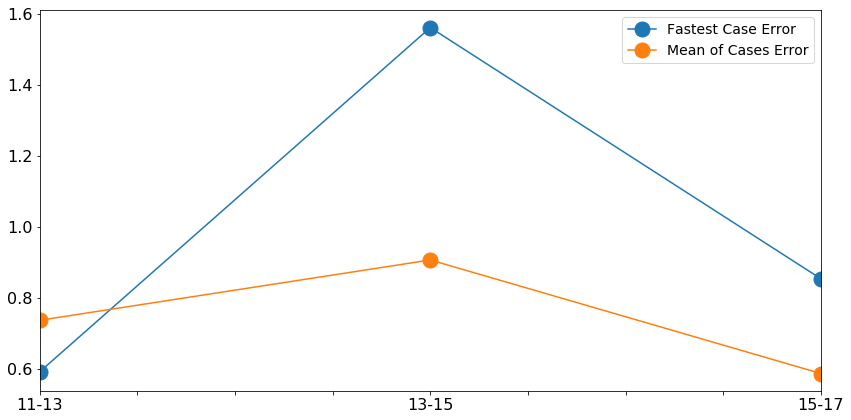

In [97]:
index = ['11-13', '13-15', '15-17']
gra15 = pd.DataFrame({'Mean of Cases Error': mean8, 'Fastest Case Error': best8}, index=index)
ax = gra15.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Women 1 Ability

In [98]:
w1g9 = wom1[(wom1.query_pb <= 9)]
w1g11 = wom1[(wom1.query_pb > 9) & (wom1.query_pb <= 11)]
w1g13 = wom1[(wom1.query_pb > 11) & (wom1.query_pb <= 13)]
w1g15 = wom1[(wom1.query_pb > 13) & (wom1.query_pb <= 15)]
w1g17 = wom1[(wom1.query_pb > 15) & (wom1.query_pb <= 17)]
w1g19 = wom1[(wom1.query_pb > 17)]

### Bin counts

In [99]:
w1g9count = w1g9.shape[0]
w1g11count = w1g11.shape[0]
w1g13count = w1g13.shape[0]
w1g15count = w1g15.shape[0]
w1g17count = w1g17.shape[0]
w1g19count = w1g19.shape[0]

In [100]:
count5 = [w1g9count, w1g11count, w1g13count, w1g15count, w1g17count, w1g19count]

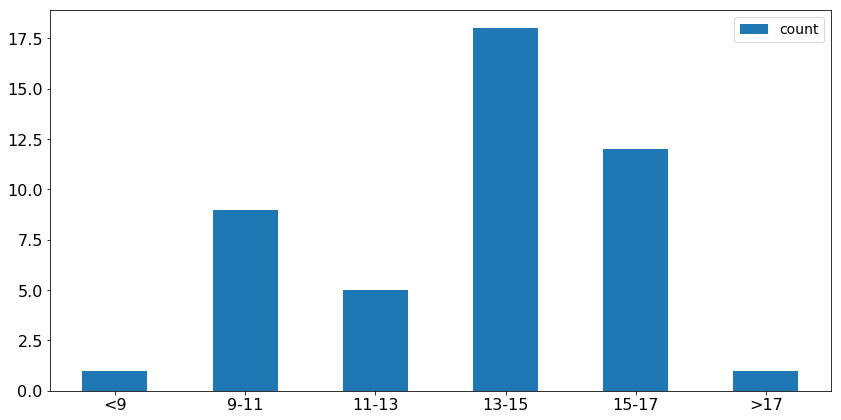

In [101]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count5}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [102]:


w1g9B = sqrt(mean_squared_error(w1g9.query_pb, w1g9.best_pb_prediction))
w1g9M = sqrt(mean_squared_error(w1g9.query_pb, w1g9.mean_pb_average_pace))

w1g11B = sqrt(mean_squared_error(w1g11.query_pb, w1g11.best_pb_prediction))
w1g11M = sqrt(mean_squared_error(w1g11.query_pb, w1g11.mean_pb_average_pace))

w1g13B = sqrt(mean_squared_error(w1g13.query_pb, w1g13.best_pb_prediction))
w1g13M = sqrt(mean_squared_error(w1g13.query_pb, w1g13.mean_pb_average_pace))

w1g15B = sqrt(mean_squared_error(w1g15.query_pb, w1g15.best_pb_prediction))
w1g15M = sqrt(mean_squared_error(w1g15.query_pb, w1g15.mean_pb_average_pace))

w1g17B = sqrt(mean_squared_error(w1g17.query_pb, w1g17.best_pb_prediction))
w1g17M = sqrt(mean_squared_error(w1g17.query_pb, w1g17.mean_pb_average_pace))

w1g19B = sqrt(mean_squared_error(w1g19.query_pb, w1g19.best_pb_prediction))
w1g19M = sqrt(mean_squared_error(w1g19.query_pb, w1g19.mean_pb_average_pace))


print('Wom1 U9 Fastest Case Error:', w1g9B)
print('Wom1 U9 Mean of Cases Error:', w1g9M)
print('Wom1 9-11 Fastest Case Error:', w1g11B)
print('Wom1 9-11 Mean of Cases Error:', w1g11M)
print('Wom1 11-13 Fastest Case Error:', w1g13B)
print('Wom1 11-13 Mean of Cases Error:', w1g13M)
print('Wom1 13-15 Fastest Case Error:', w1g15B)
print('Wom1 13-15 Mean of Cases Error:', w1g15M)
print('Wom1 15-17 Fastest Case Error:', w1g17B)
print('Wom1 15-17 Mean of Cases Error:', w1g17M)
print('Wom1 O17 Fastest Case Error:', w1g19B)
print('Wom1 017 Mean of Cases Error:', w1g19M)

Wom1 U9 Fastest Case Error: 0.1776566819179859
Wom1 U9 Mean of Cases Error: 0.5040200938827404
Wom1 9-11 Fastest Case Error: 0.4688508692555673
Wom1 9-11 Mean of Cases Error: 0.5020879575546859
Wom1 11-13 Fastest Case Error: 1.136254566990235
Wom1 11-13 Mean of Cases Error: 1.154843249689189
Wom1 13-15 Fastest Case Error: 1.0573841950820342
Wom1 13-15 Mean of Cases Error: 0.7912656323825068
Wom1 15-17 Fastest Case Error: 1.067621701848605
Wom1 15-17 Mean of Cases Error: 0.6549974671013777
Wom1 O17 Fastest Case Error: 2.6627757796087383
Wom1 017 Mean of Cases Error: 2.400200869371874


In [103]:
mean9 = [w1g9M, w1g11M, w1g13M, w1g15M, w1g17M, w1g19M]
best9 = [w1g9B, w1g11B, w1g13B, w1g15B, w1g17B, w1g19B]

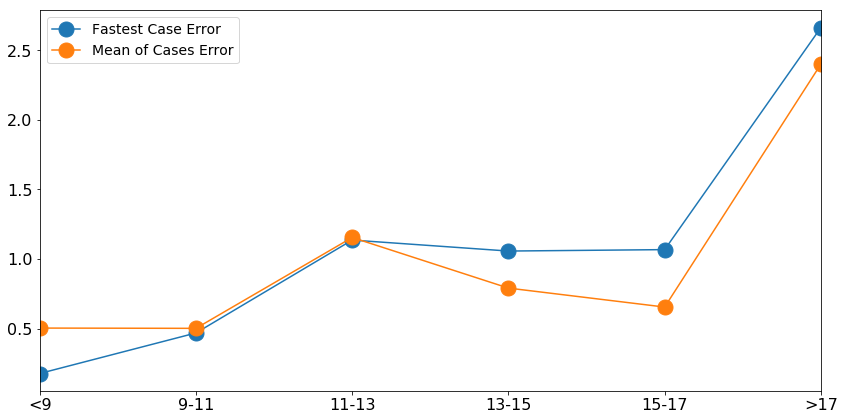

In [104]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra16 = pd.DataFrame({'Mean of Cases Error': mean9, 'Fastest Case Error': best9}, index=index)
ax = gra16.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Women 2 Ability

In [105]:
w2g9 = wom2[(wom2.query_pb <= 9)]
w2g11 = wom2[(wom2.query_pb > 9) & (wom2.query_pb <= 11)]
w2g13 = wom2[(wom2.query_pb > 11) & (wom2.query_pb <= 13)]
w2g15 = wom2[(wom2.query_pb > 13) & (wom2.query_pb <= 15)]
w2g17 = wom2[(wom2.query_pb > 15) & (wom2.query_pb <= 17)]
w2g19 = wom2[(wom2.query_pb > 17)]

### Bin counts

In [106]:
w2g9count = w2g9.shape[0]
w2g11count = w2g11.shape[0]
w2g13count = w2g13.shape[0]
w2g15count = w2g15.shape[0]
w2g17count = w2g17.shape[0]
w2g19count = w2g19.shape[0]

In [107]:
count6 = [w2g9count, w2g11count, w2g13count, w2g15count, w2g17count, w2g19count]

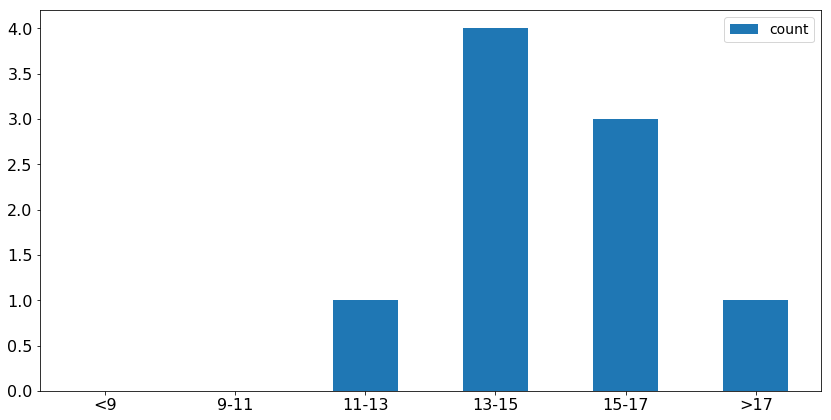

In [108]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count6}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [109]:


#w2g9B = sqrt(mean_squared_error(w2g9.query_pb, w2g9.best_pb_prediction))
#w2g9M = sqrt(mean_squared_error(w2g9.query_pb, w2g9.mean_pb_average_pace))

#w2g11B = sqrt(mean_squared_error(w2g11.query_pb, w2g11.best_pb_prediction))
#w2g11M = sqrt(mean_squared_error(w2g11.query_pb, w2g11.mean_pb_average_pace))

#w2g13B = sqrt(mean_squared_error(w2g13.query_pb, w2g13.best_pb_prediction))
#w2g13M = sqrt(mean_squared_error(w2g13.query_pb, w2g13.mean_pb_average_pace))

w2g15B = sqrt(mean_squared_error(w2g15.query_pb, w2g15.best_pb_prediction))
w2g15M = sqrt(mean_squared_error(w2g15.query_pb, w2g15.mean_pb_average_pace))

w2g17B = sqrt(mean_squared_error(w2g17.query_pb, w2g17.best_pb_prediction))
w2g17M = sqrt(mean_squared_error(w2g17.query_pb, w2g17.mean_pb_average_pace))

w2g19B = sqrt(mean_squared_error(w2g19.query_pb, w2g19.best_pb_prediction))
w2g19M = sqrt(mean_squared_error(w2g19.query_pb, w2g19.mean_pb_average_pace))


#print('Wom2 U9 Fastest Case Error:', w2g9B)
#print('Wom2 U9 Mean of Cases Error:', w2g9M)
#print('Wom2 9-11 Fastest Case Error:', w2g11B)
#print('Wom2 9-11 Mean of Cases Error:', w2g11M)
#print('Wom2 11-13 Fastest Case Error:', w2g13B)
#print('Wom2 11-13 Mean of Cases Error:', w2g13M)
print('Wom2 13-15 Fastest Case Error:', w2g15B)
print('Wom2 13-15 Mean of Cases Error:', w2g15M)
print('Wom2 15-17 Fastest Case Error:', w2g17B)
print('Wom2 15-17 Mean of Cases Error:', w2g17M)
print('Wom2 O17 Fastest Case Error:', w2g19B)
print('Wom2 017 Mean of Cases Error:', w2g19M)

Wom2 13-15 Fastest Case Error: 1.0781172303444437
Wom2 13-15 Mean of Cases Error: 0.7887390268977208
Wom2 15-17 Fastest Case Error: 2.0384188437968604
Wom2 15-17 Mean of Cases Error: 0.9295351594935781
Wom2 O17 Fastest Case Error: 5.173063712624012
Wom2 017 Mean of Cases Error: 3.220406565886945


In [110]:
mean10 = [w2g15M, w2g17M, w2g19M]
best10 = [w2g15B, w2g17B, w2g19B]

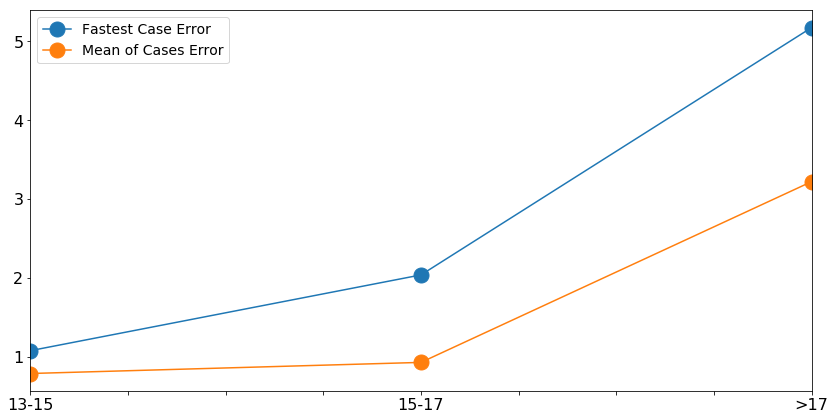

In [111]:
index = ['13-15', '15-17', '>17']
gra18 = pd.DataFrame({'Mean of Cases Error': mean10, 'Fastest Case Error': best10}, index=index)
ax = gra18.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Senior Women Ability

In [112]:
sw9 = senW[(senW.query_pb <= 9)]
sw11 = senW[(senW.query_pb > 9) & (senW.query_pb <= 11)]
sw13 = senW[(senW.query_pb > 11) & (senW.query_pb <= 13)]
sw15 = senW[(senW.query_pb > 13) & (senW.query_pb <= 15)]
sw17 = senW[(senW.query_pb > 15) & (senW.query_pb <= 17)]
sw19 = senW[(senW.query_pb > 17)]

### Bin counts

In [113]:
sw9count = sw9.shape[0]
sw11count = sw11.shape[0]
sw13count = sw13.shape[0]
sw15count = sw15.shape[0]
sw17count = sw17.shape[0]
sw19count = sw19.shape[0]

In [114]:
count7 = [sw9count, sw11count, sw13count, sw15count, sw17count, sw19count]

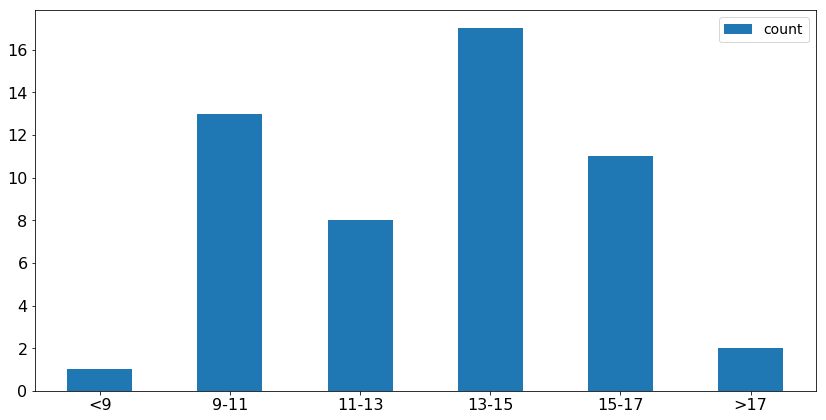

In [115]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count7}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [116]:


sw9B = sqrt(mean_squared_error(sw9.query_pb, sw9.best_pb_prediction))
sw9M = sqrt(mean_squared_error(sw9.query_pb, sw9.mean_pb_average_pace))

sw11B = sqrt(mean_squared_error(sw11.query_pb, sw11.best_pb_prediction))
sw11M = sqrt(mean_squared_error(sw11.query_pb, sw11.mean_pb_average_pace))

sw13B = sqrt(mean_squared_error(sw13.query_pb, sw13.best_pb_prediction))
sw13M = sqrt(mean_squared_error(sw13.query_pb, sw13.mean_pb_average_pace))

sw15B = sqrt(mean_squared_error(sw15.query_pb, sw15.best_pb_prediction))
sw15M = sqrt(mean_squared_error(sw15.query_pb, sw15.mean_pb_average_pace))

sw17B = sqrt(mean_squared_error(sw17.query_pb, sw17.best_pb_prediction))
sw17M = sqrt(mean_squared_error(sw17.query_pb, sw17.mean_pb_average_pace))

sw19B = sqrt(mean_squared_error(sw19.query_pb, sw19.best_pb_prediction))
sw19M = sqrt(mean_squared_error(sw19.query_pb, sw19.mean_pb_average_pace))


print('Senior Women U9 Fastest Case Error:', sw9B)
print('Senior Women U9 Mean of Cases Error:', sw9M)
print('Senior Women 9-11 Fastest Case Error:', sw11B)
print('Senior Women 9-11 Mean of Cases Error:', sw11M)
print('Senior Women 11-13 Fastest Case Error:', sw13B)
print('Senior Women 11-13 Mean of Cases Error:', sw13M)
print('Senior Women 13-15 Fastest Case Error:', sw15B)
print('Senior Women 13-15 Mean of Cases Error:', sw15M)
print('Senior Women 15-17 Fastest Case Error:', sw17B)
print('Senior Women 15-17 Mean of Cases Error:', sw17M)
print('Senior Women O17 Fastest Case Error:', sw19B)
print('Senior Women 017 Mean of Cases Error:', sw19M)

Senior Women U9 Fastest Case Error: 0.4195439465850779
Senior Women U9 Mean of Cases Error: 0.6549227679896497
Senior Women 9-11 Fastest Case Error: 0.7596048112140998
Senior Women 9-11 Mean of Cases Error: 1.4310501011381211
Senior Women 11-13 Fastest Case Error: 0.862460037396818
Senior Women 11-13 Mean of Cases Error: 0.9925154060119747
Senior Women 13-15 Fastest Case Error: 2.8489166635083234
Senior Women 13-15 Mean of Cases Error: 1.042595838372213
Senior Women 15-17 Fastest Case Error: 2.268857573762086
Senior Women 15-17 Mean of Cases Error: 0.8995400092259378
Senior Women O17 Fastest Case Error: 2.3848280344388053
Senior Women 017 Mean of Cases Error: 1.621733421516621


In [117]:
mean11 = [sw9M, sw11M, sw13M, sw15M, sw17M, sw19M]
best11 = [sw9B, sw11B, sw13B, sw15B, sw17B, sw19B]

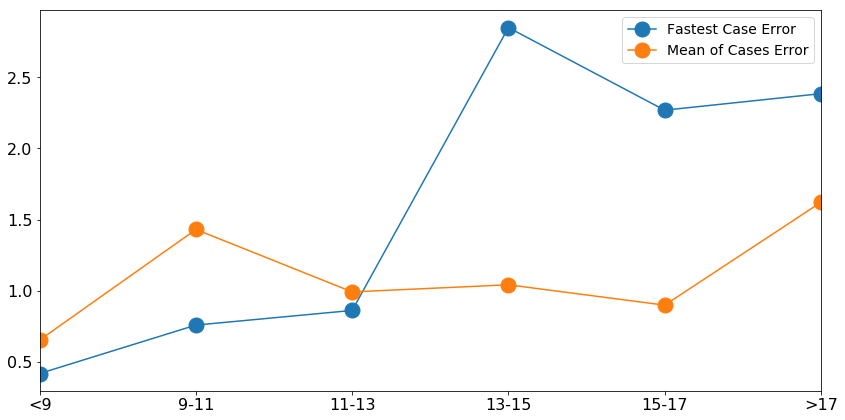

In [118]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra18 = pd.DataFrame({'Mean of Cases Error': mean11, 'Fastest Case Error': best11}, index=index)
ax = gra18.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Youth Men Ability

In [119]:
you9 = you[(you.query_pb <= 9)]
you11 = you[(you.query_pb > 9) & (you.query_pb <= 11)]
you13 = you[(you.query_pb > 11) & (you.query_pb <= 13)]
you15 = you[(you.query_pb > 13) & (you.query_pb <= 15)]
you17 = you[(you.query_pb > 15) & (you.query_pb <= 17)]
you19 = you[(you.query_pb > 17)]

### Bin counts

In [120]:
you9count = you9.shape[0]
you11count = you11.shape[0]
you13count = you13.shape[0]
you15count = you15.shape[0]
you17count = you17.shape[0]
you19count = you19.shape[0]

In [121]:
count8 = [you9count, you11count, you13count, you15count, you17count, you19count]

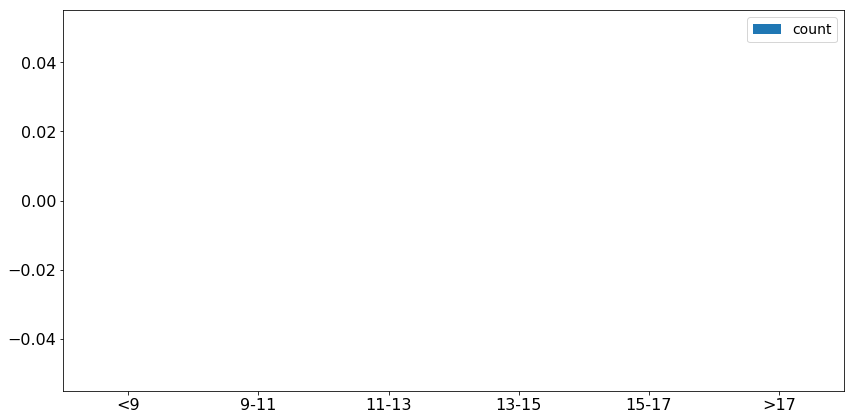

In [122]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count8}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

# Age Ability

In [123]:
frames = [sg9, sw9]
frames1 = [sg11, sw11]
frames2 = [sg13, sw13]
frames3 = [sg15, sw15]
frames4 = [sg17, sw17]
frames5 = [sg19, sw19]

## 23-39 year old Ability

In [124]:
ageS9 = pd.concat(frames)
ageS11 = pd.concat(frames1)
ageS13 = pd.concat(frames2)
ageS15 = pd.concat(frames3)
ageS17 = pd.concat(frames4)
ageS19 = pd.concat(frames5)

### Bin counts

In [125]:
ageS9count = ageS9.shape[0]
ageS11count = ageS11.shape[0]
ageS13count = ageS13.shape[0]
ageS15count = ageS15.shape[0]
ageS17count = ageS17.shape[0]
ageS19count = ageS19.shape[0]

In [126]:
count_age = [ageS9count, ageS11count, ageS13count, ageS15count, ageS17count, ageS19count]

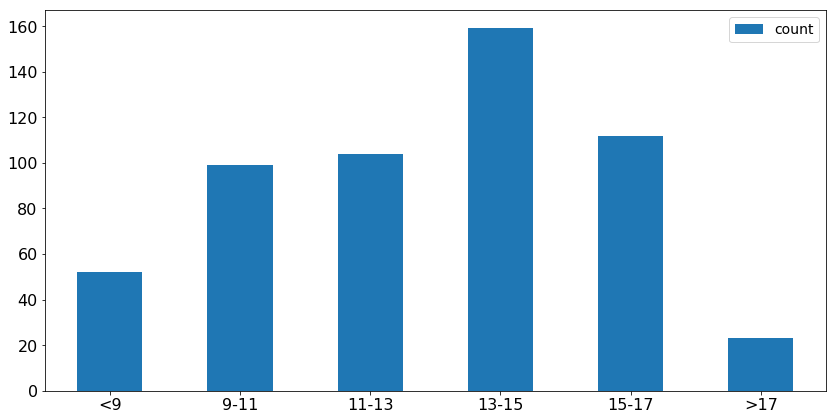

In [127]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count_age}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [128]:


ageS9B = sqrt(mean_squared_error(ageS9.query_pb, ageS9.best_pb_prediction))
ageS9M = sqrt(mean_squared_error(ageS9.query_pb, ageS9.mean_pb_average_pace))

ageS11B = sqrt(mean_squared_error(ageS11.query_pb, ageS11.best_pb_prediction))
ageS11M = sqrt(mean_squared_error(ageS11.query_pb, ageS11.mean_pb_average_pace))

ageS13B = sqrt(mean_squared_error(ageS13.query_pb, ageS13.best_pb_prediction))
ageS13M = sqrt(mean_squared_error(ageS13.query_pb, ageS13.mean_pb_average_pace))

ageS15B = sqrt(mean_squared_error(ageS15.query_pb, ageS15.best_pb_prediction))
ageS15M = sqrt(mean_squared_error(ageS15.query_pb, ageS15.mean_pb_average_pace))

ageS17B = sqrt(mean_squared_error(ageS17.query_pb, ageS17.best_pb_prediction))
ageS17M = sqrt(mean_squared_error(ageS17.query_pb, ageS17.mean_pb_average_pace))

ageS19B = sqrt(mean_squared_error(ageS19.query_pb, ageS19.best_pb_prediction))
ageS19M = sqrt(mean_squared_error(ageS19.query_pb, ageS19.mean_pb_average_pace))


print('Aged 23-39 U9 Fastest Case Error:', ageS9B)
print('Aged 23-39 U9 Mean of Cases Error:', ageS9M)
print('Aged 23-39 9-11 Fastest Case Error:', ageS11B)
print('Aged 23-39 9-11 Mean of Cases Error:', ageS11M)
print('Aged 23-39 11-13 Fastest Case Error:', ageS13B)
print('Aged 23-39 11-13 Mean of Cases Error:', ageS13M)
print('Aged 23-39 13-15 Fastest Case Error:', ageS15B)
print('Aged 23-39 13-15 Mean of Cases Error:', ageS15M)
print('Aged 23-39 15-17 Fastest Case Error:', ageS17B)
print('Aged 23-39 15-17 Mean of Cases Error:', ageS17M)
print('Aged 23-39 O17 Fastest Case Error:', ageS19B)
print('Aged 23-39 017 Mean of Cases Error:', ageS19M)

Aged 23-39 U9 Fastest Case Error: 0.883953735729571
Aged 23-39 U9 Mean of Cases Error: 1.2326350724151642
Aged 23-39 9-11 Fastest Case Error: 1.3532568721405298
Aged 23-39 9-11 Mean of Cases Error: 1.8635560940378915
Aged 23-39 11-13 Fastest Case Error: 1.4552842259028267
Aged 23-39 11-13 Mean of Cases Error: 1.4476653892557856
Aged 23-39 13-15 Fastest Case Error: 2.1083674990113437
Aged 23-39 13-15 Mean of Cases Error: 1.0338864227823257
Aged 23-39 15-17 Fastest Case Error: 2.9307547589936145
Aged 23-39 15-17 Mean of Cases Error: 0.999430076024347
Aged 23-39 O17 Fastest Case Error: 4.210757567021837
Aged 23-39 017 Mean of Cases Error: 2.3063263633338424


In [129]:
mean_age = [ageS9M, ageS11M, ageS13M, ageS15M, ageS17M, ageS19M]
best_age = [ageS9B, ageS11B, ageS13B, ageS15B, ageS17B, ageS19B]

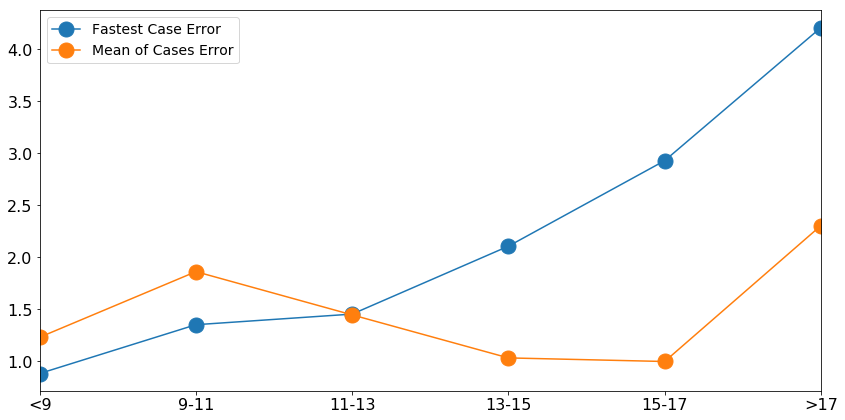

In [130]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ag = pd.DataFrame({'Mean of Cases Error': mean_age, 'Fastest Case Error': best_age}, index=index)
ax = ag.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

# AGE

In [131]:
g23 = [sen, senW]
g40 = [mas, wom1]
g50 = [mas2, wom2]
g60 = mas3
g20 = you

In [132]:
g23 = pd.concat(g23)
g40 = pd.concat(g40)
g50 = pd.concat(g50)

In [133]:
g23count = g23.shape[0]
g40count = g40.shape[0]
g50count = g50.shape[0]
g60count = g60.shape[0]
g20count = g20.shape[0]

In [134]:
count_G = [g20count, g23count, g40count, g50count, g60count]

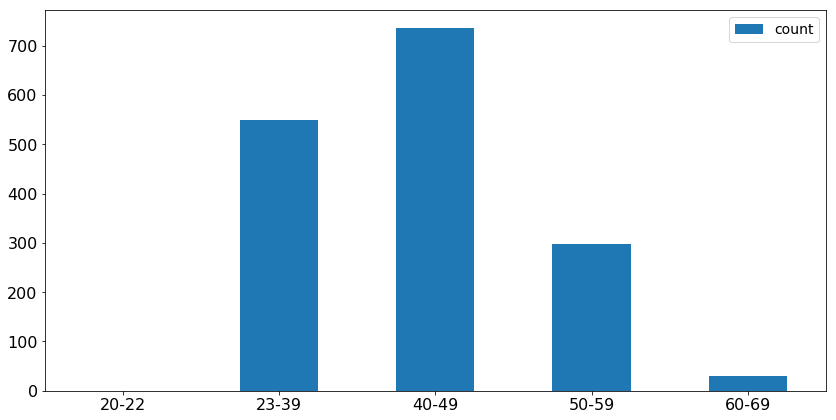

In [135]:
index = ['20-22', '23-39', '40-49', '50-59', '60-69']
ct = pd.DataFrame({'count': count_G}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [136]:


g23B = sqrt(mean_squared_error(g23.query_pb, g23.best_pb_prediction))
g23M = sqrt(mean_squared_error(g23.query_pb, g23.mean_pb_average_pace))

g40B = sqrt(mean_squared_error(g40.query_pb, g40.best_pb_prediction))
g40M = sqrt(mean_squared_error(g40.query_pb, g40.mean_pb_average_pace))

g50B = sqrt(mean_squared_error(g50.query_pb, g50.best_pb_prediction))
g50M = sqrt(mean_squared_error(g50.query_pb, g50.mean_pb_average_pace))

g60B = sqrt(mean_squared_error(g60.query_pb, g60.best_pb_prediction))
g60M = sqrt(mean_squared_error(g60.query_pb, g60.mean_pb_average_pace))


print('23-39 Fastest Case Error:', g23B)
print('23-39 Mean of Cases Error:', g23M)
print('40-49 Fastest Case Error:', g40B)
print('40-49 Mean of Cases Error:', g40M)
print('50-59 Fastest Case Error:', g50B)
print('50-59 Mean of Cases Error:', g50M)
print('60-69 Fastest Case Error:', g60B)
print('60-69 Mean of Cases Error:', g60M)

23-39 Fastest Case Error: 2.141948705211559
23-39 Mean of Cases Error: 1.3796247356075861
40-49 Fastest Case Error: 1.5812990451121258
40-49 Mean of Cases Error: 1.1368605526304025
50-59 Fastest Case Error: 1.9942729762972895
50-59 Mean of Cases Error: 1.4097979022715108
60-69 Fastest Case Error: 1.0471733675220452
60-69 Mean of Cases Error: 0.7201863346395937


In [137]:
mean_A = [g23M, g40M, g50M, g60M]
best_A = [g23B, g40B, g50B, g60B]

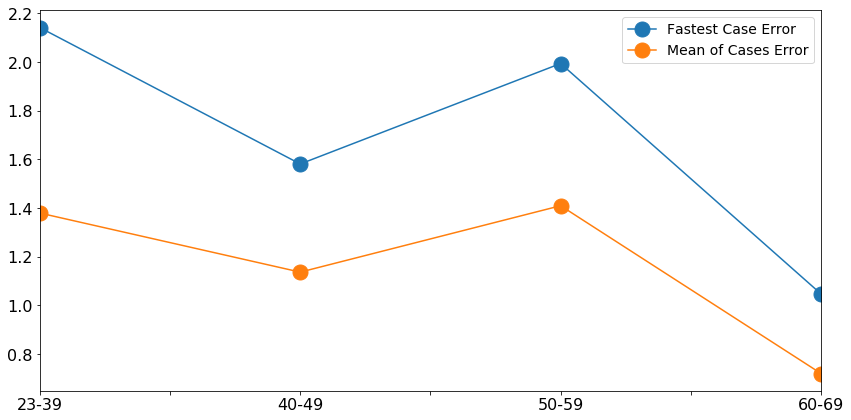

In [138]:
index = ['23-39', '40-49', '50-59', '60-69']
ageG = pd.DataFrame({'Mean of Cases Error': mean_A, 'Fastest Case Error': best_A}, index=index)
ax = ageG.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

# Testing for values of K

In [139]:
df_k5 = pd.read_csv('../../data/k5_pace_predictions.csv', encoding = "ISO-8859-1")

In [140]:
df_k20 = pd.read_csv('../../data/k20_pace_predictions.csv', encoding = "ISO-8859-1")

In [141]:
df_k3 = pd.read_csv('../../data/k3_pace_predictions.csv', encoding = "ISO-8859-1")

In [142]:
df_k5 = df_k5.dropna()
df_k20 = df_k20.dropna()
df_k3 = df_k3.dropna()

In [143]:


abestpb = sqrt(mean_squared_error(df.query_pb, df.best_pb_prediction))
ameanpb = sqrt(mean_squared_error(df.query_pb, df.mean_pb_average_pace))


abestpb5 = sqrt(mean_squared_error(df_k5.query_pb, df_k5.best_pb_prediction))
ameanpb5 = sqrt(mean_squared_error(df_k5.query_pb, df_k5.mean_pb_average_pace))

abestpb3 = sqrt(mean_squared_error(df_k3.query_pb, df_k3.best_pb_prediction))
ameanpb3 = sqrt(mean_squared_error(df_k3.query_pb, df_k3.mean_pb_average_pace))

abestpb20 = sqrt(mean_squared_error(df_k20.query_pb, df_k20.best_pb_prediction))
ameanpb20 = sqrt(mean_squared_error(df_k20.query_pb, df_k20.mean_pb_average_pace))


print('3 Fastest Case Error:', abestpb3)
print('3 Mean of Cases Error:', ameanpb3)
print('5 Fastest Case Error:', abestpb5)
print('5 Mean of Cases Error:', ameanpb5)
print('10 Fastest Case Error:', abestpb)
print('10 Mean of Cases Error:', ameanpb)
print('20 Fastest Case Error:', abestpb20)
print('20 Mean of Cases Error:', ameanpb20)

3 Fastest Case Error: 1.5677362770643126
3 Mean of Cases Error: 1.3848148296471214
5 Fastest Case Error: 1.6673347864653387
5 Mean of Cases Error: 1.3169827880382476
10 Fastest Case Error: 1.859556323248879
10 Mean of Cases Error: 1.2705799879828616
20 Fastest Case Error: 2.0734098314604728
20 Mean of Cases Error: 1.2515854585555004


In [144]:
df_k3['pb_error'] = df_k3.best_pb_prediction - df_k3.query_pb
df_k3['pb_error'] = df_k3.pb_error.abs()
df_k3['mean_error'] = df_k3.mean_pb_average_pace - df_k3.query_pb
df_k3['mean_error'] = df_k3.mean_error.abs()

df_k5['pb_error'] = df_k5.best_pb_prediction - df_k5.query_pb
df_k5['pb_error'] = df_k5.pb_error.abs()
df_k5['mean_error'] = df_k5.mean_pb_average_pace - df_k5.query_pb
df_k5['mean_error'] = df_k5.mean_error.abs()

df_k20['pb_error'] = df_k20.best_pb_prediction - df_k20.query_pb
df_k20['pb_error'] = df_k20.pb_error.abs()
df_k20['mean_error'] = df_k20.mean_pb_average_pace - df_k20.query_pb
df_k20['mean_error'] = df_k20.mean_error.abs()

In [145]:
abestper = ((df.pb_error / df.query_pb) * 100).mean()
ameanper = ((df.mean_error / df.query_pb) * 100).mean()

abestper3 = ((df_k3.pb_error / df_k3.query_pb) * 100).mean()
ameanper3 = ((df_k3.mean_error / df_k3.query_pb) * 100).mean()

abestper5 = ((df_k5.pb_error / df_k5.query_pb) * 100).mean()
ameanper5 = ((df_k5.mean_error / df_k5.query_pb) * 100).mean()

abestper20 = ((df_k20.pb_error / df_k20.query_pb) * 100).mean()
ameanper20 = ((df_k20.mean_error / df_k20.query_pb) * 100).mean()

In [146]:
meank = [ ameanpb3, ameanpb5, ameanpb, ameanpb20]
bestk = [ abestpb3, abestpb5, abestpb, abestpb20]

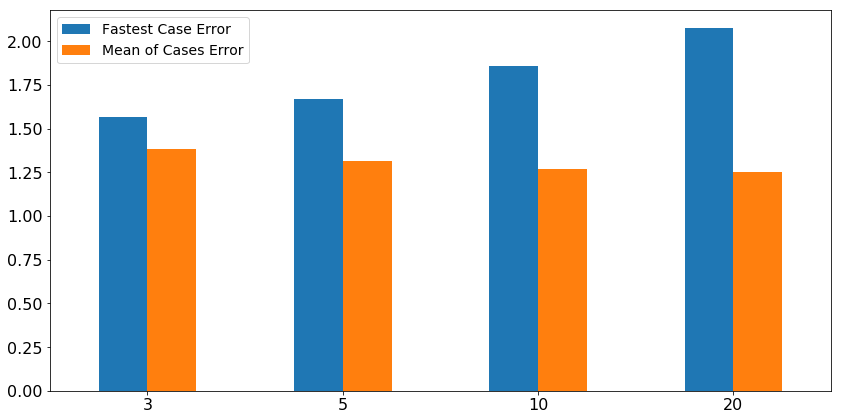

In [147]:
index = ['3', '5', '10', '20']
testK = pd.DataFrame({'Mean of Cases Error': meank, 'Fastest Case Error': bestk}, index=index)
ax = testK.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

K=20 is the optimal value for Mean of Cases Error, and k=3 is marginally for Fastest Case Error

In [148]:
meank1 = [ ameanper3, ameanper5, ameanper, ameanper20]
bestk1 = [ abestper3, abestper5, abestper, abestper20]

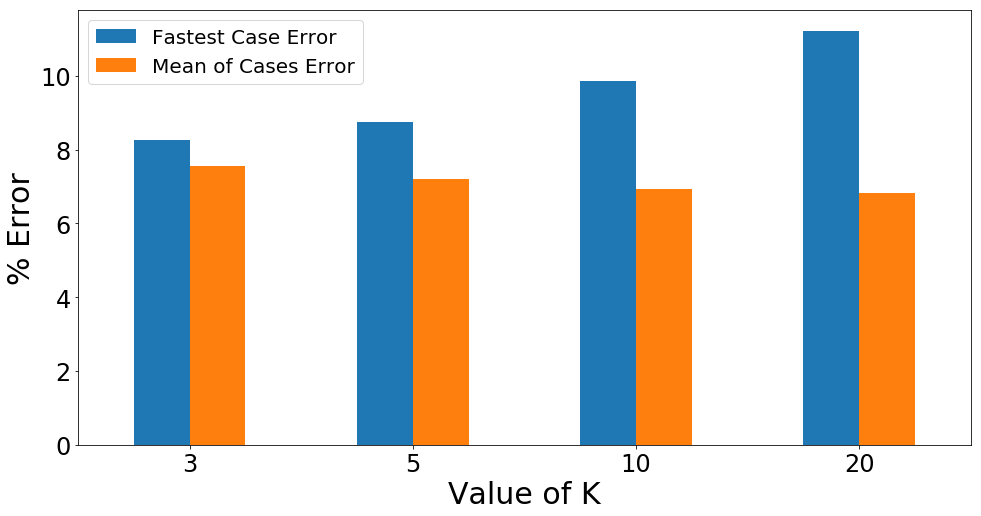

In [149]:
index = ['3', '5', '10', '20']
testK = pd.DataFrame({'Mean of Cases Error': meank1, 'Fastest Case Error': bestk1}, index=index)
ax = testK.plot.bar(figsize=(16, 8), fontsize=24, rot=0)
ax.legend(fontsize = 24)
ax.set_ylabel('% Error', fontsize = 30)
ax.set_xlabel('Value of K', fontsize = 30)
ax.legend(fontsize = 20)

The value of k determines how many similar cases retrieved for the case base. Values 3, 5, 10
and 20 are tested to see what is the optimal value for case base retrieval.
As the value for k increases the fastest case error rises, and the mean case error falls. The mean
case error begins to mellow between 10 and 20, at just over 6%. This is quite good for mean
of cases error. However, the fastest case error is above 10% when k=20. When the value is 5,
the fastest case error is lower, but the mean case error is higher than 10. It was decided that 10
would be the value for the case base retrieval. It is where the mean of cases error settles, and the
fastest case error is less than 10%. It is also sufficient data to avoid bias and over fitting.
